# Dataset 1: FOUNDATION LEARNING SKILLS

## Load libraries

In [1]:
import numpy as np
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical
from iteration_utilities import deepflatten

import warnings
warnings.filterwarnings('ignore')

## Data collection

### Foundational-learning_2021-1.xlsx

In [2]:
xl_file = pd.ExcelFile('Foundational-learning_2021-1.xlsx')

In [3]:
df = xl_file.parse('Foundational learning', header=[0, 1])

for i in range(0,7):
    df.rename({df.columns[i][1]:""}, axis="columns", inplace=True)
    
df.drop(df.index[100:], inplace=True)

In [4]:
df

Countries and areas Region Sub-region Development regions  \
                                                                     
0                 Bangladesh     SA         SA     Least Developed   
1                 Bangladesh     SA         SA     Least Developed   
2                 Bangladesh     SA         SA     Least Developed   
3                 Bangladesh     SA         SA     Least Developed   
4   Central African Republic    SSA        WCA     Least Developed   
..                       ...    ...        ...                 ...   
95              Turkmenistan    ECA       EECA      Less Developed   
96                  Zimbabwe    SSA        ESA      Less Developed   
97                  Zimbabwe    SSA        ESA      Less Developed   
98                  Zimbabwe    SSA        ESA      Less Developed   
99                  Zimbabwe    SSA        ESA      Less Developed   

      Age group   Subject      Total        Sex             Residence  \
                                          Girls       Boys      Rural   
0   Age 7 to 14   Reading  48.814716  52.392544  45.074005  46.981983   
1   Age 7 to 14  Numeracy  27.866051  28.959688  26.722622  26.574785   
2     Grade 2/3   Reading  24.599609  26.002825  23.178070  21.751852   
3     Grade 2/3  Numeracy  12.550222  12.392838  12.709662  11.408230   
4   Age 7 to 14   Reading   4.693856   4.560828   4.809788   2.057838   
..          ...       ...        ...        ...        ...        ...   
95    Grade 2/3  Numeracy  53.200000  64.800000  58.500000        NaN   
96  Age 7 to 14   Reading  44.365719  48.368660  40.518608  36.768028   
97  Age 7 to 14  Numeracy  24.620714  26.782095  22.543474  19.146442   
98    Grade 2/3   Reading  19.576178  21.219332  17.992134  12.351241   
99    Grade 2/3  Numeracy   5.108691   4.419424   5.773163   2.455187   

              Wealth quintile                                              \
        Urban         Poorest     Second     Middle     Fourth    Richest   
0   55.805260       35.360210  43.906765  50.639637  54.517452  63.611889   
1   32.791283       19.557022  25.148443  27.337364  31.040785  38.721001   
2   35.798244       16.602999  18.201494  22.767086  28.660402  42.274563   
3   17.041044        8.673656  10.437841  11.085612  12.559054  22.395241   
4    9.213395        0.486284   3.040068   1.691019   4.024787  13.331376   
..        ...             ...        ...        ...        ...        ...   
95        NaN             NaN        NaN        NaN        NaN        NaN   
96  67.629013       25.323767  34.230465  44.128292  56.616516  76.777069   
97  41.382336       12.622963  21.344015  20.532696  31.470972  47.066925   
98  41.673153        6.278276  10.377341  16.939035  27.667347  50.681393   
99  13.224252        0.395979   2.538109   2.018403   8.800878  17.066843   

     Data             
   Source       Year  
0   MICS6       2019  
1   MICS6       2019  
2   MICS6       2019  
3   MICS6       2019  
4   MICS6  2018-2019  
..    ...        ...  
95  MICS6       2019  
96  MICS6       2019  
97  MICS6       2019  
98  MICS6       2019  
99  MICS6       2019  

[100 rows x 18 columns]

**Combine the column header**

In [5]:
col = []
for i in range(len(df.columns)):
    if i < 7:
        col.append(df.columns[i][0])
    else:
        col.append(df.columns[i][0] + '-' + df.columns[i][1])

In [6]:
df.columns = col
df

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Turkmenistan,ECA,EECA,Less Developed,Grade 2/3,Numeracy,53.200000,64.800000,58.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICS6,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,MICS6,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,MICS6,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,MICS6,2019


In [7]:
df.dtypes

Countries and areas         object
Region                      object
Sub-region                  object
Development regions         object
Age group                   object
Subject                     object
Total                      float64
Sex-Girls                  float64
Sex-Boys                   float64
Residence-Rural            float64
Residence-Urban            float64
Wealth quintile-Poorest    float64
Wealth quintile-Second     float64
Wealth quintile-Middle     float64
Wealth quintile-Fourth     float64
Wealth quintile-Richest    float64
Data-Source                 object
Data-Year                   object
dtype: object

In [8]:
df.describe()

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
count,100.000000,100.000000,100.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,26.198632,27.131777,25.470714,22.350986,29.768563,17.371929,21.387640,24.266147,28.115457,37.684759
std,21.036023,22.361859,20.346177,21.112209,21.387091,19.048739,20.722063,22.238528,22.135513,23.564574
min,0.394631,0.051010,0.473044,0.022533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.432622,7.059242,7.625648,4.550694,12.301420,2.479506,3.636985,4.610935,8.740612,17.095623
50%,21.480844,21.059666,20.877780,13.027112,24.972675,8.001463,12.608856,16.606810,24.916075,37.256182
75%,43.923937,45.792249,38.673675,36.599011,44.219891,27.821079,33.977889,42.645542,44.460066,58.154563
max,81.800000,84.400000,82.000000,83.400000,79.000000,76.100000,89.800000,78.600000,79.900000,84.800000


## Data Cleaning

### Step 1: Handling missing data

**Are there any missing values?**

In [9]:
df.isnull().sum() * 100 / len(df)

Countries and areas        0.0
Region                     0.0
Sub-region                 0.0
Development regions        0.0
Age group                  0.0
Subject                    0.0
Total                      0.0
Sex-Girls                  0.0
Sex-Boys                   0.0
Residence-Rural            6.0
Residence-Urban            6.0
Wealth quintile-Poorest    6.0
Wealth quintile-Second     6.0
Wealth quintile-Middle     6.0
Wealth quintile-Fourth     6.0
Wealth quintile-Richest    6.0
Data-Source                0.0
Data-Year                  0.0
dtype: float64

In [10]:
df.isnull().sum()

Countries and areas        0
Region                     0
Sub-region                 0
Development regions        0
Age group                  0
Subject                    0
Total                      0
Sex-Girls                  0
Sex-Boys                   0
Residence-Rural            6
Residence-Urban            6
Wealth quintile-Poorest    6
Wealth quintile-Second     6
Wealth quintile-Middle     6
Wealth quintile-Fourth     6
Wealth quintile-Richest    6
Data-Source                0
Data-Year                  0
dtype: int64

In [11]:
df.shape

(100, 18)

In [12]:
null_rows = df.isnull()  # this does not work. Append .any(axis=1) to make it work
null_rows  # boolean indexing

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`isnull()` applied on the whole dataframe does not produce the intended behaviour. This function needs to be applied to check for *any* NaN values along the column side (*axis=1*).

**Any data that can be cleaned or transformed?**

In [13]:
df.head(7)

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019
5,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Numeracy,1.527805,1.202405,1.811385,0.870304,2.655113,0.150043,0.833223,1.646962,1.321195,3.428246,MICS6,2018-2019
6,Central African Republic,SSA,WCA,Least Developed,Grade 2/3,Reading,1.775748,1.798235,1.758916,1.379215,2.422417,0.000000,2.188316,1.472594,1.221289,3.482309,MICS6,2018-2019


### Step 2: Remove the irrelevant observations

**Drop the data with missing data 'NaN'**

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Source,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,MICS6,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,MICS6,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,MICS6,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,MICS6,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,MICS6,2018-2019


In [16]:
df.shape

(94, 18)

**Drop the unnecessary data column**

In [17]:
df = df.drop(('Data-Source'), axis=1)

In [18]:
df.head()

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019


## Describing the Data

In [19]:
df.dtypes

Countries and areas         object
Region                      object
Sub-region                  object
Development regions         object
Age group                   object
Subject                     object
Total                      float64
Sex-Girls                  float64
Sex-Boys                   float64
Residence-Rural            float64
Residence-Urban            float64
Wealth quintile-Poorest    float64
Wealth quintile-Second     float64
Wealth quintile-Middle     float64
Wealth quintile-Fourth     float64
Wealth quintile-Richest    float64
Data-Year                   object
dtype: object

In [20]:
df.describe()

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,25.024077,25.861465,24.228419,22.350986,29.768563,17.371929,21.387640,24.266147,28.115457,37.684759
std,20.770505,21.860690,20.015429,21.112209,21.387091,19.048739,20.722063,22.238528,22.135513,23.564574
min,0.394631,0.051010,0.473044,0.022533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.234411,6.782024,7.440390,4.550694,12.301420,2.479506,3.636985,4.610935,8.740612,17.095623
50%,19.756634,19.898628,20.007759,13.027112,24.972675,8.001463,12.608856,16.606810,24.916075,37.256182
75%,39.055473,41.669121,37.287081,36.599011,44.219891,27.821079,33.977889,42.645542,44.460066,58.154563
max,81.800000,84.400000,82.000000,83.400000,79.000000,76.100000,89.800000,78.600000,79.900000,84.800000


**Is the data entered by a human?**

In [21]:
df['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [22]:
df['Development regions'].unique()

array(['Least Developed', 'Less Developed', 'More Developed'],
      dtype=object)

In [23]:
df['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

### Box Plot

In [24]:
df_total = df[['Total']]
df_total

,Total
0,48.814716
1,27.866051
2,24.599609
3,12.550222
4,4.693856
...,...
93,70.000000
96,44.365719
97,24.620714
98,19.576178


<AxesSubplot:ylabel='Total'>

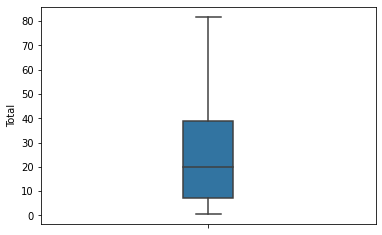

In [25]:
sns.boxplot(y='Total', width=0.15, data=df_total)

<AxesSubplot:xlabel='Subject', ylabel='Total'>

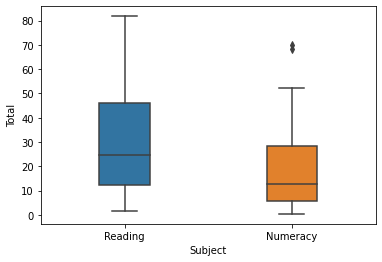

In [26]:
sns.boxplot(x='Subject', y='Total', width=0.3, data=df)

<AxesSubplot:xlabel='Subject', ylabel='Total'>

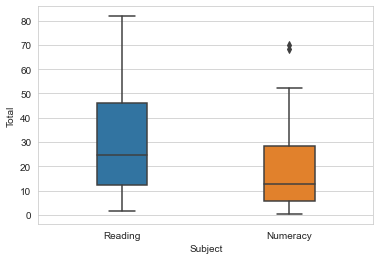

In [27]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=df)

## Additional Dataset

### Literacy-rate_2021-1.xlsx

In [28]:
xl_file = pd.ExcelFile('Literacy-rate_2021-1.xlsx')

literacy = xl_file.parse('Youth literacy rate, aged 15-24', header=[0, 1])
    
literacy

ISO3        Countries and areas             Region  \
    Unnamed: 0_level_1         Unnamed: 1_level_1 Unnamed: 2_level_1   
0                  AFG                Afghanistan                 SA   
1                  ALB                    Albania                ECA   
2                  DZA                    Algeria               MENA   
3                  AND                    Andorra                ECA   
4                  AGO                     Angola                SSA   
..                 ...                        ...                ...   
214                NaN                 South Asia                 SA   
215                NaN         Sub-Saharan Africa                SSA   
216                NaN  Eastern & Southern Africa                NaN   
217                NaN      West & Central Africa                NaN   
218                NaN                      World                NaN   

             Sub-region Development Regions              Total     Gender  \
    UNICEF Sub-region 1  Unnamed: 4_level_1 Unnamed: 5_level_1     Female   
0                    SA     Least Developed          65.420547  56.254749   
1                  EECA      More Developed          99.330002  99.629997   
2                  MENA      Less Developed          97.426521  97.252159   
3                    WE      More Developed                NaN        NaN   
4                   ESA     Least Developed                NaN        NaN   
..                  ...                 ...                ...        ...   
214                 NaN            89.95697                NaN        NaN   
215                 NaN           76.328102                NaN        NaN   
216                 ESA           79.924637                NaN        NaN   
217                 WCA           72.341187                NaN        NaN   
218                 NaN           91.725731                NaN        NaN   

                    Source              
          Male Data source Time period  
0    74.084801         UIS      2018.0  
1    99.050003         UIS      2018.0  
2    97.594063         UIS      2018.0  
3          NaN         NaN         NaN  
4          NaN         NaN         NaN  
..         ...         ...         ...  
214        NaN         NaN         NaN  
215        NaN         NaN         NaN  
216        NaN         NaN         NaN  
217        NaN         NaN         NaN  
218        NaN         NaN         NaN  

[219 rows x 10 columns]

**Combine the column header**

In [29]:
col = []
for i in range(len(literacy.columns)):
    if i < 6:
        col.append(literacy.columns[i][0])
    else:
        col.append(literacy.columns[i][0] + '-' + literacy.columns[i][1])    
#literacy.drop(literacy.index[100:], inplace=True)
literacy.columns = col
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
214,NaN,South Asia,SA,NaN,89.95697,NaN,NaN,NaN,NaN,NaN
215,NaN,Sub-Saharan Africa,SSA,NaN,76.328102,NaN,NaN,NaN,NaN,NaN
216,NaN,Eastern & Southern Africa,NaN,ESA,79.924637,NaN,NaN,NaN,NaN,NaN
217,NaN,West & Central Africa,NaN,WCA,72.341187,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Step 1: Handling missing data

**Are there any missing values?**

In [30]:
literacy.isnull().sum() * 100 / len(literacy)

ISO3                    7.762557
Countries and areas     1.826484
Region                  5.936073
Sub-region              6.849315
Development Regions     2.283105
Total                  64.383562
Gender-Female          64.383562
Gender-Male            64.383562
Source-Data source     64.383562
Source-Time period     64.383562
dtype: float64

In [31]:
literacy.isnull().sum()

ISO3                    17
Countries and areas      4
Region                  13
Sub-region              15
Development Regions      5
Total                  141
Gender-Female          141
Gender-Male            141
Source-Data source     141
Source-Time period     141
dtype: int64

In [32]:
literacy.shape

(219, 10)

### Step 2: Remove the irrelevant observations

**Drop the data columns with missing data 'NaN'**

In [33]:
literacy.dropna(inplace=True)
literacy

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Gender-Female,Gender-Male,Source-Data source,Source-Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,56.254749,74.084801,UIS,2018.0
1,ALB,Albania,ECA,EECA,More Developed,99.330002,99.629997,99.050003,UIS,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,97.252159,97.594063,UIS,2018.0
7,ARG,Argentina,LAC,LAC,Less Developed,99.505524,99.757652,99.241829,UIS,2018.0
13,BHR,Bahrain,MENA,MENA,Less Developed,99.687202,99.301338,99.976143,UIS,2018.0
...,...,...,...,...,...,...,...,...,...,...
194,URY,Uruguay,LAC,LAC,Less Developed,98.880272,99.165993,98.604752,UIS,2018.0
195,UZB,Uzbekistan,ECA,EECA,Less Developed,99.999939,99.999924,99.999931,UIS,2018.0
196,VUT,Vanuatu,EAP,EAP,Least Developed,96.282120,96.596611,95.976570,UIS,2018.0
198,VNM,Viet Nam,EAP,EAP,Less Developed,98.408096,98.353142,98.460121,UIS,2018.0


### Subset and renaming column

In [34]:
literacy.rename(columns={'Total':'Literacy_Total'}, inplace=True)
literacy = literacy[['Countries and areas', 'Literacy_Total']]
literacy

,Countries and areas,Literacy_Total
0,Afghanistan,65.420547
1,Albania,99.330002
2,Algeria,97.426521
7,Argentina,99.505524
13,Bahrain,99.687202
...,...,...
194,Uruguay,98.880272
195,Uzbekistan,99.999939
196,Vanuatu,96.282120
198,Viet Nam,98.408096


## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [35]:
df[['Total', 'Sex-Girls', 'Sex-Boys', 'Residence-Rural', 'Residence-Urban', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889
1,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001
2,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563
3,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241
4,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376
...,...,...,...,...,...,...,...,...,...,...
93,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000
96,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069
97,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925
98,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393


In [36]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


Data after normalization is performed on the data:

In [37]:
df_min_max_scaled

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019


### Merging

Merging is the process of combining two or more datasets into a single dataset. 
<br><br>
In our datasets, outer merging is performed to allow us to unify and better understand the data when analyzing it.

In [38]:
df_merge = df.copy()

In [39]:
literacy.rename(columns={'Total':'Literacy_Total'}, inplace=True)
literacy = literacy[['Countries and areas', 'Literacy_Total']]
literacy

,Countries and areas,Literacy_Total
0,Afghanistan,65.420547
1,Albania,99.330002
2,Algeria,97.426521
7,Argentina,99.505524
13,Bahrain,99.687202
...,...,...
194,Uruguay,98.880272
195,Uzbekistan,99.999939
196,Vanuatu,96.282120
198,Viet Nam,98.408096


In [40]:
df_merge = df_merge.merge(literacy, how='left')
df_merge

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,NaN
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,NaN
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,NaN
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,NaN


In [41]:
df_merge['Literacy_Total'].fillna(value=df_merge['Literacy_Total'].mean(), inplace=True)

In [42]:
#df_merge[['Literacy_Total']] = sc.fit_transform(df_merge[['Literacy_Total']])

In [43]:
df_merge

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,88.629192
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,88.629192
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,88.629192
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,88.629192


### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘Total’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [44]:
df_min_max_scaled['Total'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

Text(0.5, 1.0, 'Total bins')

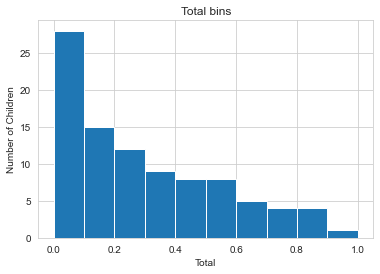

In [45]:
plt.hist(df_min_max_scaled['Total'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total bins')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [46]:
bins = np.linspace(min(df_min_max_scaled['Total']), max(df_min_max_scaled['Total']), 4)
bins

array([0.        , 0.33333333, 0.66666667, 1.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [47]:
group_names = ['Low', 'Medium', 'High']

In order to determine the value of ‘Total’ is belongs to which level: ‘Low’, ‘Medium’, or ‘High’, the pandas function `cut` is applied to the data. 

In [48]:
df_min_max_scaled['Total-binned'] = pd.cut(df_min_max_scaled['Total'], bins, labels=group_names, include_lowest=True )

In [49]:
df_min_max_scaled[['Total','Total-binned']].head(15)

,Total,Total-binned
0,0.594802,Medium
1,0.337464,Medium
2,0.297339,Low
3,0.149322,Low
4,0.052813,Low
5,0.013920,Low
6,0.016966,Low
7,0.000000,Low
8,0.049165,Low
9,0.079003,Low


In [50]:
df_min_max_scaled['Total-binned'].value_counts()

Low       59
Medium    25
High      10
Name: Total-binned, dtype: int64

Plotting the distribution of the bins:

Text(0.5, 1.0, 'Total Bins')

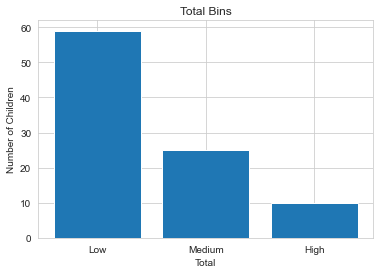

In [51]:
plt.bar(group_names, df_min_max_scaled['Total-binned'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of Children')
plt.title('Total Bins')

## Exploratory Data Analysis

In [52]:
df_cleaned = df_min_max_scaled.copy()

In [53]:
df_cleaned

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Total-binned
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,0.594802,0.620535,0.547070,0.563215,0.706396,0.464655,0.488939,0.644270,0.682321,0.750140,2019,Medium
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,0.337464,0.342727,0.321974,0.318458,0.415080,0.256991,0.280049,0.347804,0.388495,0.456616,2019,Medium
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,0.297339,0.307672,0.278497,0.260614,0.453142,0.218173,0.202689,0.289658,0.358703,0.498521,2019,Low
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,0.149322,0.146319,0.150093,0.136556,0.215709,0.113977,0.116234,0.141038,0.157185,0.264095,2019,Low
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,0.052813,0.053466,0.053194,0.024411,0.116625,0.006390,0.033854,0.021514,0.050373,0.157210,2018-2019,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,0.855046,0.850621,0.831957,0.832089,0.897468,0.806833,0.757238,0.919847,0.891114,0.932783,2019,High
96,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,0.540150,0.572830,0.491194,0.440713,0.856063,0.332770,0.381186,0.561429,0.708592,0.905390,2019,Medium
97,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,0.297598,0.316911,0.270713,0.229365,0.523827,0.165873,0.237684,0.261230,0.393880,0.555034,2019,Low
98,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,0.235630,0.250961,0.214887,0.147866,0.527508,0.082500,0.115561,0.215509,0.346275,0.597658,2019,Low


### Descriptive Question

**“What is the mean of the percentage of children who acquired foundational learning skills are from age 7 to 14?”**


In [54]:
df_cleaned['Total'].unique()

array([0.59480211, 0.33746447, 0.29733884, 0.14932174, 0.05281255,
       0.01392013, 0.01696592, 0.        , 0.04916508, 0.07900308,
       0.02628041, 0.0613843 , 0.10233371, 0.00127469, 0.095865  ,
       0.00414718, 0.14760852, 0.10122852, 0.0589104 , 0.04094385,
       0.25783733, 0.18791412, 0.06695199, 0.09070282, 0.14776384,
       0.08716702, 0.06627206, 0.05039741, 0.43038994, 0.26021728,
       0.35147016, 0.14232494, 0.70463373, 0.62586819, 0.4705136 ,
       0.36508159, 0.53291381, 0.15819981, 0.15269859, 0.00870904,
       0.2840384 , 0.08432335, 0.16061969, 0.0431432 , 0.77210111,
       0.56352979, 0.55051513, 0.35060715, 0.4763856 , 0.44780898,
       0.23900976, 0.23668374, 0.78502646, 0.49757613, 0.44341632,
       0.13839809, 0.30344008, 0.08392053, 0.46652061, 0.43484891,
       0.24157059, 0.21387929, 0.19074573, 0.14517942, 0.06825832,
       0.06441808, 0.64251426, 0.55776914, 0.31765184, 0.31463363,
       0.5702703 , 0.30206648, 0.27775963, 0.05051276, 0.88885

In [55]:
df_cleaned['Age group'].unique()

array(['Age 7 to 14', 'Grade 2/3'], dtype=object)

In [56]:
df_cleaned['Subject'].unique()

array(['Reading', 'Numeracy'], dtype=object)

In [57]:
df_mean = df_cleaned.copy()
df_mean[col_list] = sc.inverse_transform(df_mean[col_list])

In [58]:
df_mean.loc[df['Age group'] == 'Age 7 to 14'].groupby(['Age group', 'Subject'])['Total'].mean().to_frame('Mean of percentage of children who acquired foundational learning skills')

Mean of percentage of children who acquired foundational learning skills
Age group   Subject                                                                           
Age 7 to 14 Numeracy                                          26.760529                       
            Reading                                           39.023024

### Exploratory Question

**“What is the relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills?”**


In [59]:
df_cleaned[['Total', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']]

,Total,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest
0,0.594802,0.464655,0.488939,0.644270,0.682321,0.750140
1,0.337464,0.256991,0.280049,0.347804,0.388495,0.456616
2,0.297339,0.218173,0.202689,0.289658,0.358703,0.498521
3,0.149322,0.113977,0.116234,0.141038,0.157185,0.264095
4,0.052813,0.006390,0.033854,0.021514,0.050373,0.157210
...,...,...,...,...,...,...
93,0.855046,0.806833,0.757238,0.919847,0.891114,0.932783
96,0.540150,0.332770,0.381186,0.561429,0.708592,0.905390
97,0.297598,0.165873,0.237684,0.261230,0.393880,0.555034
98,0.235630,0.082500,0.115561,0.215509,0.346275,0.597658


**Data Visualization**

The correlation between two attributes, such as ‘Total’ and ‘Wealth quintile’ can be better visualized in heatmap and regression plot of data points. 

<AxesSubplot:>

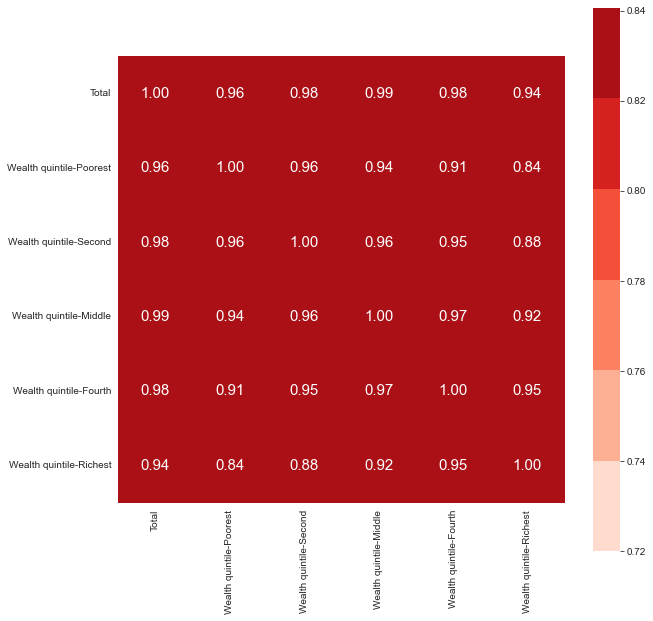

In [60]:
corr = df_cleaned[['Total', 'Wealth quintile-Poorest', 'Wealth quintile-Second', 'Wealth quintile-Middle', 'Wealth quintile-Fourth', 'Wealth quintile-Richest']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

(0.0, 1.0499999999999998)

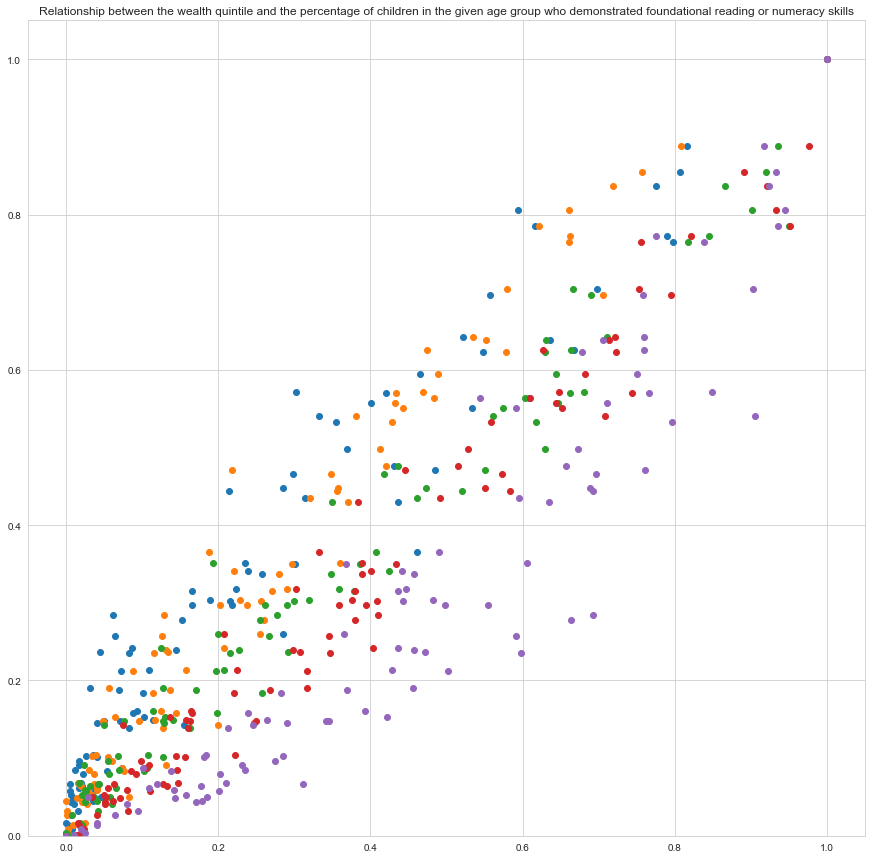

In [61]:
fig, axs = plt.subplots(figsize=(15,15), sharey=True)
plt.title('Relationship between the wealth quintile and the percentage of children in the given age group who demonstrated foundational reading or numeracy skills')
axs.scatter(df_cleaned['Wealth quintile-Poorest'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Second'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Middle'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Fourth'],df_cleaned['Total'])
axs.scatter(df_cleaned['Wealth quintile-Richest'],df_cleaned['Total'])
plt.ylim(0,)

(0.0, 1.1763505794001565)

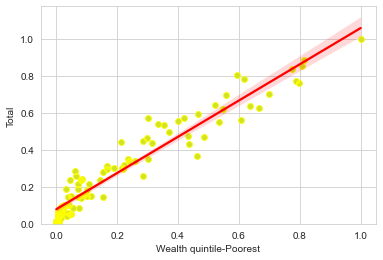

In [62]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Poorest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "yellow"}, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 1.232083554553929)

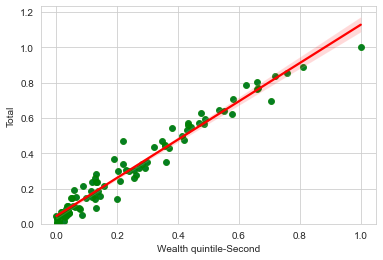

In [63]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Second'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "g"}, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 1.0499999999999998)

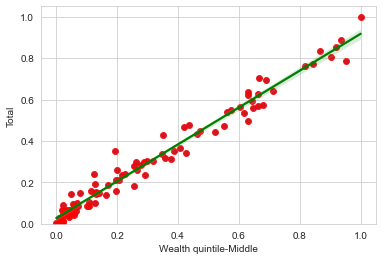

In [64]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Middle'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "r"}, line_kws={"color": "green"})
plt.ylim(0,)

(0.0, 1.0515098608170916)

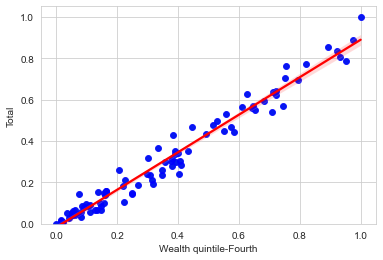

In [65]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Fourth'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "b"}, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 1.055424760273369)

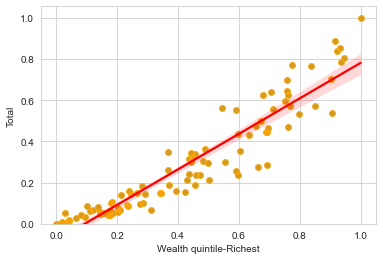

In [66]:
sns.scatterplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned)
sns.regplot(x=df_cleaned['Wealth quintile-Richest'], y=df_cleaned['Total'], data=df_cleaned,
            scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.ylim(0,)

### Inferential Question

**“Based on the sample population of children who lived in Mongolia, the percentage of children who demonstrated foundational reading skills is higher than the percentage of children who demonstrated foundation numeracy skills. Will this hypothesis stand for the children who lived in Lesotho?”**

In [67]:
dfIQ = df_cleaned[['Countries and areas','Age group','Subject','Total']]
dfIQ

,Countries and areas,Age group,Subject,Total
0,Bangladesh,Age 7 to 14,Reading,0.594802
1,Bangladesh,Age 7 to 14,Numeracy,0.337464
2,Bangladesh,Grade 2/3,Reading,0.297339
3,Bangladesh,Grade 2/3,Numeracy,0.149322
4,Central African Republic,Age 7 to 14,Reading,0.052813
...,...,...,...,...
93,Turkmenistan,Age 7 to 14,Numeracy,0.855046
96,Zimbabwe,Age 7 to 14,Reading,0.540150
97,Zimbabwe,Age 7 to 14,Numeracy,0.297598
98,Zimbabwe,Grade 2/3,Reading,0.235630


**Data Visualization**

In [68]:
filter = dfIQ['Countries and areas'] == 'Mongolia'
dfMong = dfIQ[filter]
dfMong

,Countries and areas,Age group,Subject,Total
44,Mongolia,Age 7 to 14,Reading,0.772101
45,Mongolia,Age 7 to 14,Numeracy,0.563530
46,Mongolia,Grade 2/3,Reading,0.550515
47,Mongolia,Grade 2/3,Numeracy,0.350607


<AxesSubplot:xlabel='Subject', ylabel='Total'>

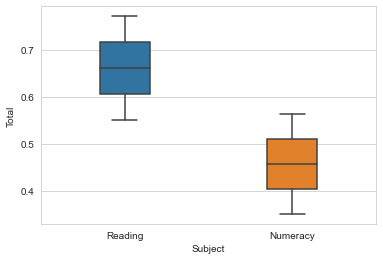

In [69]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfMong)

In [70]:
filter = dfIQ['Countries and areas'] == 'Lesotho'
dfLeso = dfIQ[filter]
dfLeso

,Countries and areas,Age group,Subject,Total
36,Lesotho,Age 7 to 14,Reading,0.532914
37,Lesotho,Age 7 to 14,Numeracy,0.158200
38,Lesotho,Grade 2/3,Reading,0.152699
39,Lesotho,Grade 2/3,Numeracy,0.008709


<AxesSubplot:xlabel='Subject', ylabel='Total'>

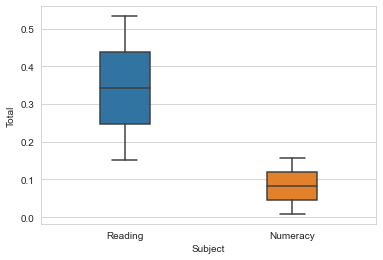

In [71]:
sns.set_style('whitegrid')  # with lines
sns.boxplot(x='Subject', y='Total', width=0.3, data=dfLeso)

## Predictive Question

**“What is the predicted average percentage of children of Mongolia who acquired foundational learning skills in the year 2022?"**

### Data modeling

In [72]:
df_pred = df_merge.copy()

In [73]:
df_pred

,Countries and areas,Region,Sub-region,Development regions,Age group,Subject,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Data-Year,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Reading,48.814716,52.392544,45.074005,46.981983,55.805260,35.360210,43.906765,50.639637,54.517452,63.611889,2019,94.862427
1,Bangladesh,SA,SA,Least Developed,Age 7 to 14,Numeracy,27.866051,28.959688,26.722622,26.574785,32.791283,19.557022,25.148443,27.337364,31.040785,38.721001,2019,94.862427
2,Bangladesh,SA,SA,Least Developed,Grade 2/3,Reading,24.599609,26.002825,23.178070,21.751852,35.798244,16.602999,18.201494,22.767086,28.660402,42.274563,2019,94.862427
3,Bangladesh,SA,SA,Least Developed,Grade 2/3,Numeracy,12.550222,12.392838,12.709662,11.408230,17.041044,8.673656,10.437841,11.085612,12.559054,22.395241,2019,94.862427
4,Central African Republic,SSA,WCA,Least Developed,Age 7 to 14,Reading,4.693856,4.560828,4.809788,2.057838,9.213395,0.486284,3.040068,1.691019,4.024787,13.331376,2018-2019,38.268650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Turkmenistan,ECA,EECA,Less Developed,Age 7 to 14,Numeracy,70.000000,71.800000,68.300000,69.400000,70.900000,61.400000,68.000000,72.300000,71.200000,79.100000,2019,88.629192
90,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Reading,44.365719,48.368660,40.518608,36.768028,67.629013,25.323767,34.230465,44.128292,56.616516,76.777069,2019,88.629192
91,Zimbabwe,SSA,ESA,Less Developed,Age 7 to 14,Numeracy,24.620714,26.782095,22.543474,19.146442,41.382336,12.622963,21.344015,20.532696,31.470972,47.066925,2019,88.629192
92,Zimbabwe,SSA,ESA,Less Developed,Grade 2/3,Reading,19.576178,21.219332,17.992134,12.351241,41.673153,6.278276,10.377341,16.939035,27.667347,50.681393,2019,88.629192


In [74]:
df1 = df_pred.groupby(['Countries and areas']).mean()
df1

,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total
Countries and areas,,,,,,,,,,,
Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427
Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650
Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,88.629192
Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,88.629192
Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,88.629192
Ghana,12.674759,11.714040,13.613712,7.257946,20.007260,2.965855,9.244453,9.863954,15.696862,31.864600,92.490967
Guinea-Bissau,7.550170,6.811296,8.414608,5.329292,11.426943,3.616009,5.439116,5.593220,10.653504,12.506775,88.629192
Kiribati,24.498808,28.008585,21.276123,25.201998,23.782427,21.125338,26.591137,15.562242,21.064391,39.231844,88.629192
Kyrgyzstan,44.477615,47.493664,41.494103,40.868649,52.184168,43.984973,32.767901,44.911137,43.086610,61.754772,99.750000


In [75]:
df1.shape

(25, 11)

<AxesSubplot:>

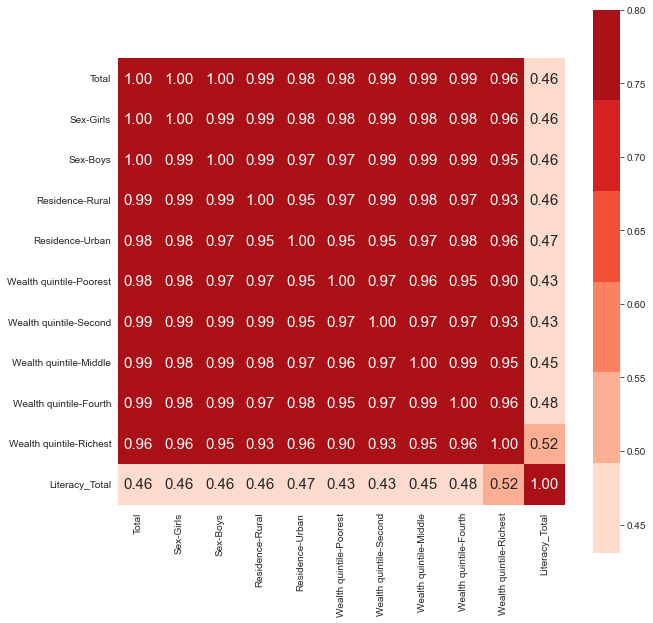

In [76]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

In [77]:
df1 = df1.reset_index()

### Split train-test dataset

In [78]:
X = df1[['Total']]
Y = df1[['Literacy_Total']]

Text(0.5, 1.0, 'Total vs Literacy_Total')

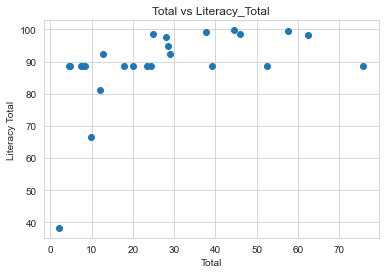

In [79]:
plt.plot(X,Y, linestyle='',marker='o')
plt.xlabel('Total')
plt.ylabel('Literacy Total')
plt.title('Total vs Literacy_Total')

<AxesSubplot:xlabel='Total', ylabel='Literacy_Total'>

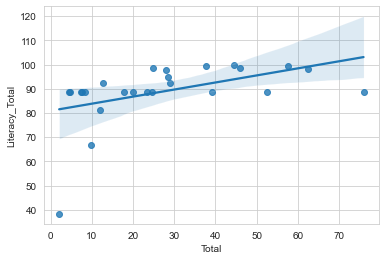

In [80]:
sns.regplot(X, Y, data=df1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [82]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
lm.coef_

array([[0.28026504]])

In [84]:
lm.intercept_

array([81.18755437])

In [85]:
lm_y_test = lm.predict(X_test)
lm_y_train = lm.predict(X_train)

print('Train r2 score: ', r2_score(lm_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, lm_y_test)) 
print('Train MAE: ', mean_absolute_error(lm_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, lm_y_test))
print('Train MSE: ', mean_squared_error(lm_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, lm_y_test))

Train r2 score:  -3.660288056520913
Test r2 score:  0.3917083662423514
Train MAE:  7.152553217015968
Test MAE:  7.256409821517974
Train MSE:  131.0307153311166
Test MSE:  83.71201922752401


### Create Decision Tree Regression model

In [86]:
dtr1 = DecisionTreeRegressor(max_depth=3)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [87]:
dtr_y_test = dtr1.predict(X_test)
dtr_y_train = dtr1.predict(X_train)

print('Train r2 score: ', r2_score(dtr_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, dtr_y_test)) 
print('Train MAE: ', mean_absolute_error(dtr_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, dtr_y_test))
print('Train MSE: ', mean_squared_error(dtr_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, dtr_y_test))

Train r2 score:  0.9286202624026584
Test r2 score:  0.23187957351466804
Train MAE:  2.3416746398925765
Test MAE:  6.620469079589839
Train MSE:  10.603040058719918
Test MSE:  105.7073751183834


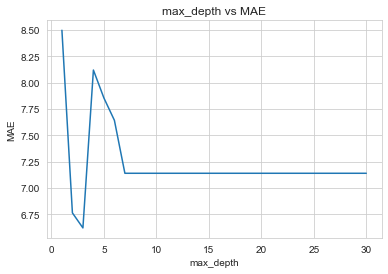

In [88]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE')
plt.show()

### Create Neural Network Regression model

In [89]:
df_nn = df1.copy()

In [90]:
df_countries = df.copy()

In [91]:
df_countries = df_countries[['Countries and areas', 'Region', 'Sub-region', 'Development regions']]

In [92]:
df_countries = df_countries.drop_duplicates().reset_index()
df_countries.drop(columns=['index'], inplace = True)

In [93]:
df_nn = df_nn.merge(df_countries, how='left')
df_nn.head()

,Countries and areas,Total,Sex-Girls,Sex-Boys,Residence-Rural,Residence-Urban,Wealth quintile-Poorest,Wealth quintile-Second,Wealth quintile-Middle,Wealth quintile-Fourth,Wealth quintile-Richest,Literacy_Total,Region,Sub-region,Development regions
0,Bangladesh,28.457650,29.936974,26.921090,26.679213,35.358958,20.048472,24.423636,27.957425,31.694423,41.750673,94.862427,SA,SA,Least Developed
1,Central African Republic,2.098010,1.903119,2.257982,1.235993,3.572731,0.274432,1.675630,1.446283,1.641818,5.060483,38.268650,SSA,WCA,Least Developed
2,Chad,4.787120,3.673869,5.796649,3.337531,10.998854,1.028218,2.092605,3.087163,5.168837,11.012239,88.629192,SSA,WCA,Least Developed
3,Democratic Republic of the Congo,4.538583,4.197713,4.839093,1.951247,7.877791,0.841633,2.178914,2.471255,5.541369,12.632685,88.629192,SSA,WCA,Least Developed
4,Gambia,7.490967,8.470875,6.290215,3.353714,9.795963,3.051757,4.936874,6.671892,9.002618,15.863188,88.629192,SSA,WCA,Least Developed


In [94]:
df_nn = df_nn[['Countries and areas', 'Region', 'Sub-region', 'Development regions', 'Total', 'Literacy_Total']]

In [95]:
sc_total = MinMaxScaler(feature_range = (0, 1))
sc_literacy = MinMaxScaler(feature_range = (0, 1))

sc_total = sc_total.fit(df1[['Total']])
sc_literacy = sc_literacy.fit(df1[['Literacy_Total']])

In [96]:
df_nn[['Total']] = sc_total.transform(df_nn[['Total']])
df_nn[['Literacy_Total']] = sc_literacy.transform(df_nn[['Literacy_Total']])
df_nn

,Countries and areas,Region,Sub-region,Development regions,Total,Literacy_Total
0,Bangladesh,SA,SA,Least Developed,0.357167,0.920503
1,Central African Republic,SSA,WCA,Least Developed,0.000000,0.000000
2,Chad,SSA,WCA,Least Developed,0.036437,0.819119
3,Democratic Republic of the Congo,SSA,WCA,Least Developed,0.033069,0.819119
4,Gambia,SSA,WCA,Least Developed,0.073073,0.819119
5,Ghana,SSA,WCA,Less Developed,0.143313,0.881931
6,Guinea-Bissau,SSA,WCA,Least Developed,0.073876,0.819119
7,Kiribati,EAP,EAP,Least Developed,0.303526,0.819119
8,Kyrgyzstan,ECA,EECA,Less Developed,0.574234,1.000000
9,Lesotho,SSA,ESA,Least Developed,0.212007,0.819119


In [97]:
d = defaultdict(LabelEncoder)
col_list = [col for col in df_nn.columns.tolist() if df_nn[col].dtype.name == "object"]

df_nn[col_list] = df_nn[col_list].apply(lambda x: d[x.name].fit_transform(x))

In [98]:
X = df_nn.drop(columns=['Literacy_Total'])
y = df_nn['Literacy_Total'] 

In [99]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [100]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = xTrain.shape[1]
n_cols

5

In [101]:
#add model layers
model.add(Dense(250,  input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
#train model
history = model.fit(xTrain, yTrain, validation_split=0.2, epochs=200,  verbose=2)

Epoch 1/200
1/1 - 1s - loss: 0.0396 - val_loss: 0.0363 - 850ms/epoch - 850ms/step
Epoch 2/200
1/1 - 0s - loss: 0.0440 - val_loss: 0.0725 - 47ms/epoch - 47ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0346 - val_loss: 0.1192 - 62ms/epoch - 62ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0335 - val_loss: 0.1390 - 57ms/epoch - 57ms/step
Epoch 5/200
1/1 - 0s - loss: 0.0348 - val_loss: 0.1399 - 57ms/epoch - 57ms/step
Epoch 6/200
1/1 - 0s - loss: 0.0313 - val_loss: 0.1327 - 62ms/epoch - 62ms/step
Epoch 7/200
1/1 - 0s - loss: 0.0292 - val_loss: 0.1263 - 59ms/epoch - 59ms/step
Epoch 8/200
1/1 - 0s - loss: 0.0300 - val_loss: 0.1279 - 64ms/epoch - 64ms/step
Epoch 9/200
1/1 - 0s - loss: 0.0304 - val_loss: 0.1372 - 60ms/epoch - 60ms/step
Epoch 10/200
1/1 - 0s - loss: 0.0293 - val_loss: 0.1505 - 72ms/epoch - 72ms/step
Epoch 11/200
1/1 - 0s - loss: 0.0278 - val_loss: 0.1629 - 58ms/epoch - 58ms/step
Epoch 12/200
1/1 - 0s - loss: 0.0273 - val_loss: 0.1717 - 61ms/epoch - 61ms/step
Epoch 13/200
1/1 - 0s - loss: 0.027

Epoch 102/200
1/1 - 0s - loss: 0.0248 - val_loss: 0.2026 - 96ms/epoch - 96ms/step
Epoch 103/200
1/1 - 0s - loss: 0.0248 - val_loss: 0.2025 - 98ms/epoch - 98ms/step
Epoch 104/200
1/1 - 0s - loss: 0.0247 - val_loss: 0.2025 - 97ms/epoch - 97ms/step
Epoch 105/200
1/1 - 0s - loss: 0.0247 - val_loss: 0.2023 - 88ms/epoch - 88ms/step
Epoch 106/200
1/1 - 0s - loss: 0.0247 - val_loss: 0.2022 - 115ms/epoch - 115ms/step
Epoch 107/200
1/1 - 0s - loss: 0.0247 - val_loss: 0.2022 - 114ms/epoch - 114ms/step
Epoch 108/200
1/1 - 0s - loss: 0.0246 - val_loss: 0.2023 - 92ms/epoch - 92ms/step
Epoch 109/200
1/1 - 0s - loss: 0.0246 - val_loss: 0.2023 - 103ms/epoch - 103ms/step
Epoch 110/200
1/1 - 0s - loss: 0.0246 - val_loss: 0.2023 - 113ms/epoch - 113ms/step
Epoch 111/200
1/1 - 0s - loss: 0.0246 - val_loss: 0.2022 - 115ms/epoch - 115ms/step
Epoch 112/200
1/1 - 0s - loss: 0.0245 - val_loss: 0.2021 - 107ms/epoch - 107ms/step
Epoch 113/200
1/1 - 0s - loss: 0.0245 - val_loss: 0.2018 - 90ms/epoch - 90ms/step
Epoc

In [104]:
nn_y_test = model.predict(xTest)
nn_y_train = model.predict(xTrain)

In [105]:
print('Train r2 score: ', r2_score(yTrain, nn_y_train))
print('Test r2 score: ', r2_score(yTest, nn_y_test)) 
print('Train MAE: ', mean_absolute_error(yTrain, nn_y_train))
print('Test MAE: ',mean_absolute_error(yTest, nn_y_test))
print('Train MSE: ', mean_squared_error(yTrain, nn_y_train))
print('Test MSE: ',mean_squared_error(yTest, nn_y_test))

Train r2 score:  -0.4872137497729949
Test r2 score:  -2.252220587585408
Train MAE:  0.16148685365479853
Test MAE:  0.2466204718556241
Train MSE:  0.06261602384043782
Test MSE:  0.11840476484311932


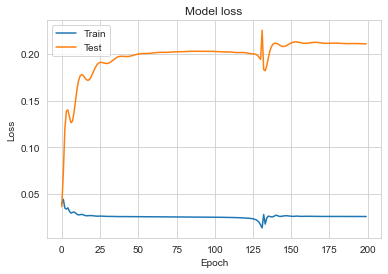

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Regression models prediction

In [107]:
dtr1.predict([[50]])

array([95.49667694])

In [108]:
lm.predict([[50]])

array([[95.20080623]])

In [109]:
df_pred = df_nn.copy()

In [110]:
real_X = df_pred.drop(columns=['Literacy_Total'])

In [111]:
real_X = real_X.assign(Total=50)

In [112]:
real_X[['Total']] = sc_total.transform(real_X[['Total']])

In [113]:
sc_literacy.inverse_transform([[model.predict(real_X).mean()]])

array([[92.61922267]])

## Causal Question

**“Will an increase in the age of children increase the percentage of children who demonstrated foundational reading or numeracy skills?”**

In [114]:
df2 = df.copy()

In [115]:
df2 = df2.groupby(['Age group']).mean().Total.to_frame().reset_index()
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508


<AxesSubplot:xlabel='Age group'>

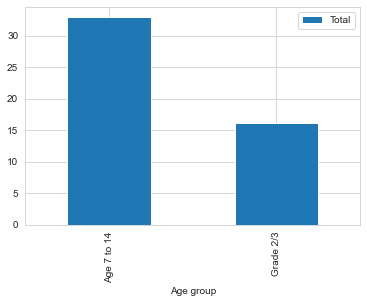

In [116]:
df2.plot.bar(x='Age group', y='Total')

In [117]:
df2.iloc[0].Total

32.89177642941475

For grade 2/3, the age is around 7 to 9, so we take the total of age 7 to 14 minus with grade 2/3 to get the total percentage of age 9 to 14

In [118]:
new_row = pd.DataFrame({'Age group':['Age 9 to 14'], 'Total': [df2.iloc[0].Total - df2.iloc[1].Total]})
df2 = pd.concat([df2, new_row], ignore_index = True, axis = 0)
df2

,Age group,Total
0,Age 7 to 14,32.891776
1,Grade 2/3,16.083508
2,Age 9 to 14,16.808268


In [119]:
df2.drop(df2.loc[df2['Age group']=='Age 7 to 14'].index, inplace=True)

In [120]:
df2.loc[1,['Age group']] = 'Age 7 to 9'

In [121]:
df2

,Age group,Total
1,Age 7 to 9,16.083508
2,Age 9 to 14,16.808268


<AxesSubplot:xlabel='Age group'>

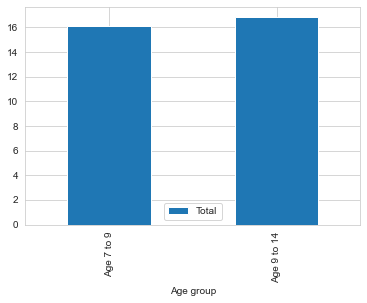

In [122]:
df2.plot.bar(x='Age group', y='Total')

# Dataset 2: COLLEGE AND UNIVERSITIES

## Data collection

### Colleges_and_Universities.csv

In [123]:
df = pd.read_csv('Colleges_and_Universities.csv')

df.head()

,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,-92.260490,34.759308,7001,107840,Shorter College,604 Locust St,NOT AVAILABLE,N Little Rock,AR,72114,...,NOT AVAILABLE,-3,1,24,28,52,2,0,18,NOT AVAILABLE
1,-121.289431,38.713353,7002,112181,Citrus Heights Beauty College,7518 Baird Way,NOT AVAILABLE,Citris Heights,CA,95610,...,NOT AVAILABLE,-3,1,6,24,30,2,0,9,NOT AVAILABLE
2,-118.287070,34.101481,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,NOT AVAILABLE,Los Angeles,CA,90027,...,NOT AVAILABLE,-3,1,0,24,24,2,0,11,NOT AVAILABLE
3,-121.652662,36.700631,7004,125310,Waynes College of Beauty,1271 North Main Street,NOT AVAILABLE,Salinas,CA,93906,...,NOT AVAILABLE,-3,1,18,16,34,2,0,9,NOT AVAILABLE
4,-71.070737,42.369930,7005,164368,Hult International Business School,1 Education Street,NOT AVAILABLE,Cambridge,MA,02141,...,NOT AVAILABLE,-3,2,0,2243,2243,2,0,143,NOT AVAILABLE


In [124]:
df.shape

(7735, 46)

In [125]:
df.dtypes

X             float64
Y             float64
FID             int64
IPEDSID         int64
NAME           object
ADDRESS        object
ADDRESS2       object
CITY           object
STATE          object
ZIP            object
ZIP4           object
TELEPHONE      object
TYPE            int64
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
SOURCE_DAT     object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
STFIPS          int64
COFIPS          int64
SECTOR          int64
LEVEL_          int64
HI_OFFER        int64
DEG_GRANT       int64
LOCALE          int64
CLOSE_DATE     object
MERGE_ID        int64
ALIAS          object
SIZE_SET        int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
HOUSING         int64
DORM_CAP        int64
TOT_EMPLOY      int64
SHELTER_ID

In [126]:
df.describe()

,X,Y,FID,IPEDSID,TYPE,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,...,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.00000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.00000,7735.00000,7735.000000
mean,-90.506517,37.425260,3868.000000,281864.075889,2.201034,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,...,19.491920,424.98927,1.787977,1.577893,1032.233355,1727.344796,2759.578151,1.63245,388.18384,474.268649
std,17.595184,5.800367,2233.046499,131529.530737,0.842711,7826.541161,16713.057137,5.800367,17.595184,131.336865,...,9.381378,9463.44996,5.878855,1.077236,3006.886573,4790.666270,6695.364257,0.70059,1199.39176,1488.795583
min,-170.743175,-14.323171,1.000000,100636.000000,-3.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,...,-3.000000,-2.00000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-2.00000,0.00000,0.000000
25%,-97.362353,33.990664,1934.500000,170270.500000,1.000000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,...,12.000000,-2.00000,-3.000000,1.000000,0.000000,81.000000,114.000000,1.00000,0.00000,20.000000
50%,-86.663047,38.855847,3868.000000,222886.000000,2.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,...,21.000000,-2.00000,-2.000000,1.000000,59.000000,318.000000,434.000000,2.00000,0.00000,74.000000
75%,-79.225690,41.392206,5801.500000,440314.000000,3.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,...,21.000000,-2.00000,5.000000,2.000000,600.000000,1415.000000,2232.500000,2.00000,105.00000,383.000000
max,171.378442,71.324702,7735.000000,480569.000000,3.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,...,43.000000,443544.00000,18.000000,5.000000,65310.000000,204920.000000,204920.000000,2.00000,16018.00000,28018.000000


## Data Cleanning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [127]:
df.isnull().sum()

X             0
Y             0
FID           0
IPEDSID       0
NAME          0
ADDRESS       0
ADDRESS2      0
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCE_DAT    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         0
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMPLOY    0
SHELTER_ID    0
dtype: int64

In [128]:
df.isnull().sum() * 100 / len(df)

X             0.0
Y             0.0
FID           0.0
IPEDSID       0.0
NAME          0.0
ADDRESS       0.0
ADDRESS2      0.0
CITY          0.0
STATE         0.0
ZIP           0.0
ZIP4          0.0
TELEPHONE     0.0
TYPE          0.0
STATUS        0.0
POPULATION    0.0
COUNTY        0.0
COUNTYFIPS    0.0
COUNTRY       0.0
LATITUDE      0.0
LONGITUDE     0.0
NAICS_CODE    0.0
NAICS_DESC    0.0
SOURCE        0.0
SOURCE_DAT    0.0
VAL_METHOD    0.0
VAL_DATE      0.0
WEBSITE       0.0
STFIPS        0.0
COFIPS        0.0
SECTOR        0.0
LEVEL_        0.0
HI_OFFER      0.0
DEG_GRANT     0.0
LOCALE        0.0
CLOSE_DATE    0.0
MERGE_ID      0.0
ALIAS         0.0
SIZE_SET      0.0
INST_SIZE     0.0
PT_ENROLL     0.0
FT_ENROLL     0.0
TOT_ENROLL    0.0
HOUSING       0.0
DORM_CAP      0.0
TOT_EMPLOY    0.0
SHELTER_ID    0.0
dtype: float64

### Step 2: Remove the irrelevant observations

**Drop the unnecessary data column**

In [129]:
df.drop(['X', 'Y', 'FID', 'ADDRESS2', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'SOURCE','SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'SECTOR', 'LEVEL_','HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'HOUSING', 'DORM_CAP', 'SHELTER_ID'], inplace=True, axis=1)

## Describing the Data

In [130]:
df.shape

(7735, 21)

In [131]:
df.dtypes

IPEDSID         int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP            object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
STFIPS          int64
COFIPS          int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
TOT_EMPLOY      int64
dtype: object

In [132]:
df.describe()

,IPEDSID,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,281864.075889,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,29.152165,83.819134,1.577893,1032.233355,1727.344796,2759.578151,474.268649
std,131529.530737,7826.541161,16713.057137,5.800367,17.595184,131.336865,16.704485,103.618466,1.077236,3006.886573,4790.666270,6695.364257,1488.795583
min,100636.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,1.000000,-999.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,170270.500000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,13.000000,29.000000,1.000000,0.000000,81.000000,114.000000,20.000000
50%,222886.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,29.000000,61.000000,1.000000,59.000000,318.000000,434.000000,74.000000
75%,440314.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,42.000000,107.000000,2.000000,600.000000,1415.000000,2232.500000,383.000000
max,480569.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,78.000000,840.000000,5.000000,65310.000000,204920.000000,204920.000000,28018.000000


## Additional Dataset 

### co-est2021-alldata.csv

In [133]:
population = pd.read_csv('co-est2021-alldata.csv', encoding= 'unicode_escape')

In [134]:
population

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,40,3,6,1,0,Alabama,Alabama,5024279,5024803,5039877,...,242,114572,114572,114572,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950
1,50,3,6,1,1,Alabama,Autauga County,58805,58877,59095,...,8,442,442,442,11.002611,11.545112,-0.542502,0.084766,4.017903,4.102668
2,50,3,6,1,3,Alabama,Baldwin County,231767,233140,239294,...,-82,2177,2177,2177,9.567474,12.137145,-2.569671,0.266704,28.702422,28.969126
3,50,3,6,1,5,Alabama,Barbour County,25223,25180,24964,...,1,2789,2789,2789,10.928526,15.714742,-4.786216,0.039885,-3.908743,-3.868858
4,50,3,6,1,7,Alabama,Bibb County,22293,22223,22477,...,-1,2062,2062,2062,10.111857,12.617450,-2.505593,0.089485,13.825503,13.914989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,42272,42158,41614,...,-4,720,720,720,11.483551,9.549730,1.933820,0.429738,-15.255694,-14.825956
3190,50,4,8,56,39,Wyoming,Teton County,23331,23347,23575,...,1,215,215,215,9.377264,4.091897,5.285367,0.340991,4.049273,4.390265
3191,50,4,8,56,41,Wyoming,Uinta County,20450,20441,20635,...,0,187,187,187,11.003993,8.082579,2.921414,0.146071,6.378420,6.524491
3192,50,4,8,56,43,Wyoming,Washakie County,7685,7658,7705,...,-1,119,119,119,9.893901,14.971034,-5.077133,0.000000,11.325913,11.325913


In [135]:
population.dtypes

SUMLEV                     int64
REGION                     int64
DIVISION                   int64
STATE                      int64
COUNTY                     int64
STNAME                    object
CTYNAME                   object
ESTIMATESBASE2020          int64
POPESTIMATE2020            int64
POPESTIMATE2021            int64
NPOPCHG2020                int64
NPOPCHG2021                int64
BIRTHS2020                 int64
BIRTHS2021                 int64
DEATHS2020                 int64
DEATHS2021                 int64
NATURALCHG2020             int64
NATURALCHG2021             int64
INTERNATIONALMIG2020       int64
INTERNATIONALMIG2021       int64
DOMESTICMIG2020            int64
DOMESTICMIG2021            int64
NETMIG2020                 int64
NETMIG2021                 int64
RESIDUAL2020               int64
RESIDUAL2021               int64
GQESTIMATESBASE2020        int64
GQESTIMATES2020            int64
GQESTIMATES2021            int64
RBIRTH2021               float64
RDEATH2021

In [136]:
population.describe()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,NPOPCHG2020,NPOPCHG2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3.194000e+03,3.194000e+03,3194.000000,3194.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,49.840326,2.669067,5.192549,30.250157,101.845335,2.075449e+05,2.075774e+05,2.078233e+05,32.435191,245.876644,...,0.000000,4859.648716,4859.648716,4859.648716,10.476861,12.679550,-2.202689,0.346609,4.977854,5.324463
std,1.253691,0.807730,1.974832,15.159773,107.576954,1.269954e+06,1.269952e+06,1.269011e+06,2217.319165,12021.429239,...,125.328544,28286.520532,28286.520532,28286.520532,2.396415,3.293721,4.349472,0.700890,14.365999,14.258942
min,40.000000,1.000000,1.000000,1.000000,0.000000,6.400000e+01,6.700000e+01,5.700000e+01,-46316.000000,-319020.000000,...,-3645.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.258065,-1.295197,-112.903226,-112.903226
25%,50.000000,2.000000,4.000000,18.000000,33.000000,1.097425e+04,1.092850e+04,1.094275e+04,-52.750000,-75.000000,...,-2.000000,139.000000,139.000000,139.000000,9.108967,10.558537,-4.908418,0.000000,-2.475981,-2.169724
50%,50.000000,3.000000,5.000000,29.000000,77.000000,2.657950e+04,2.653750e+04,2.641100e+04,-13.000000,32.500000,...,1.000000,553.500000,553.500000,553.500000,10.371332,12.778106,-2.327026,0.147322,3.796239,4.193642
75%,50.000000,3.000000,7.000000,45.000000,133.000000,7.408775e+04,7.390850e+04,7.400625e+04,20.000000,312.750000,...,5.000000,2288.500000,2288.500000,2288.500000,11.658382,14.810587,0.249733,0.426908,11.860913,12.157585
max,50.000000,4.000000,9.000000,56.000000,840.000000,3.953822e+07,3.949974e+07,3.923784e+07,72148.000000,310288.000000,...,1285.000000,815696.000000,815696.000000,815696.000000,29.072202,48.387097,19.022552,17.299737,80.717489,80.717489


## Data Cleaning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [137]:
population.isnull().sum()

SUMLEV                   0
REGION                   0
DIVISION                 0
STATE                    0
COUNTY                   0
STNAME                   0
CTYNAME                  0
ESTIMATESBASE2020        0
POPESTIMATE2020          0
POPESTIMATE2021          0
NPOPCHG2020              0
NPOPCHG2021              0
BIRTHS2020               0
BIRTHS2021               0
DEATHS2020               0
DEATHS2021               0
NATURALCHG2020           0
NATURALCHG2021           0
INTERNATIONALMIG2020     0
INTERNATIONALMIG2021     0
DOMESTICMIG2020          0
DOMESTICMIG2021          0
NETMIG2020               0
NETMIG2021               0
RESIDUAL2020             0
RESIDUAL2021             0
GQESTIMATESBASE2020      0
GQESTIMATES2020          0
GQESTIMATES2021          0
RBIRTH2021               0
RDEATH2021               0
RNATURALCHG2021          0
RINTERNATIONALMIG2021    0
RDOMESTICMIG2021         0
RNETMIG2021              0
dtype: int64

In [138]:
population.isnull().sum() * 100 / len(population)

SUMLEV                   0.0
REGION                   0.0
DIVISION                 0.0
STATE                    0.0
COUNTY                   0.0
STNAME                   0.0
CTYNAME                  0.0
ESTIMATESBASE2020        0.0
POPESTIMATE2020          0.0
POPESTIMATE2021          0.0
NPOPCHG2020              0.0
NPOPCHG2021              0.0
BIRTHS2020               0.0
BIRTHS2021               0.0
DEATHS2020               0.0
DEATHS2021               0.0
NATURALCHG2020           0.0
NATURALCHG2021           0.0
INTERNATIONALMIG2020     0.0
INTERNATIONALMIG2021     0.0
DOMESTICMIG2020          0.0
DOMESTICMIG2021          0.0
NETMIG2020               0.0
NETMIG2021               0.0
RESIDUAL2020             0.0
RESIDUAL2021             0.0
GQESTIMATESBASE2020      0.0
GQESTIMATES2020          0.0
GQESTIMATES2021          0.0
RBIRTH2021               0.0
RDEATH2021               0.0
RNATURALCHG2021          0.0
RINTERNATIONALMIG2021    0.0
RDOMESTICMIG2021         0.0
RNETMIG2021   

No missing data (NaN)

### Step 2: Get desired observations for further analysis

**Get the necessary data columns**

In [139]:
population = population[['STATE', 'COUNTY', 'POPESTIMATE2021']]

In [140]:
population

,STATE,COUNTY,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


## Describing the Data

In [141]:
population.shape

(3194, 3)

In [142]:
population.dtypes

STATE              int64
COUNTY             int64
POPESTIMATE2021    int64
dtype: object

In [143]:
population.describe()

,STATE,COUNTY,POPESTIMATE2021
count,3194.000000,3194.000000,3.194000e+03
mean,30.250157,101.845335,2.078233e+05
std,15.159773,107.576954,1.269011e+06
min,1.000000,0.000000,5.700000e+01
25%,18.000000,33.000000,1.094275e+04
50%,29.000000,77.000000,2.641100e+04
75%,45.000000,133.000000,7.400625e+04
max,56.000000,840.000000,3.923784e+07


In [144]:
population.nunique()

STATE                51
COUNTY              326
POPESTIMATE2021    3142
dtype: int64

## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [145]:
df[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,70,34.759308,-92.260490,1,24,28,52,18
1,39,38.713353,-121.289431,1,6,24,30,9
2,35,34.101481,-118.287070,1,0,24,24,11
3,43,36.700631,-121.652662,1,18,16,34,9
4,2386,42.369930,-71.070737,2,0,2243,2243,143
...,...,...,...,...,...,...,...,...
7730,163,41.347074,-72.042638,1,119,19,138,25
7731,3470,39.482878,-80.160335,2,772,2415,3187,283
7732,0,33.895708,-118.236350,1,0,0,0,0
7733,752,34.042875,-84.176526,1,227,441,668,84


Data after normalization is performed on the data:

In [146]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,0.000308,0.573073,0.229400,0.428571,0.000367,0.000137,0.000254,0.000642
1,0.000171,0.619239,0.144550,0.428571,0.000092,0.000117,0.000146,0.000321
2,0.000154,0.565392,0.153326,0.428571,0.000000,0.000117,0.000117,0.000393
3,0.000189,0.595739,0.143488,0.428571,0.000276,0.000078,0.000166,0.000321
4,0.010486,0.661932,0.291336,0.571429,0.000000,0.010946,0.010946,0.005104
...,...,...,...,...,...,...,...,...
7730,0.000716,0.649990,0.288495,0.428571,0.001822,0.000093,0.000673,0.000892
7731,0.015250,0.628224,0.264768,0.571429,0.011821,0.011785,0.015552,0.010101
7732,0.000000,0.562990,0.153474,0.428571,0.000000,0.000000,0.000000,0.000000
7733,0.003305,0.564708,0.253029,0.428571,0.003476,0.002152,0.003260,0.002998


### Merging

Merging is the process of combining two or more datasets into a single dataset. 
<br><br>
In our datasets, outer merging is performed to allow us to unify and better understand the data when analyzing it.

In [147]:
df_merge = df.copy()

In [148]:
population.rename(columns={"STATE": "STFIPS", "COUNTY": "COFIPS"}, inplace=True)
population

,STFIPS,COFIPS,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


In [149]:
df_merge = df_merge.merge(population, how='left')
df_merge

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,397821.0
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,1588921.0
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,9829544.0
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,437325.0
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,1614742.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,Connecticut Center for Massage Therapy-Groton,1154 Poquonnock Rd,Groton,CT,06340,163,New London,9011,US,...,611519,Other Technical and Trade Schools,9,11,1,119,19,138,25,268805.0
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,56001.0
7732,443517,Universal College of Beauty Inc-Compton,718 West Compton Blvd,Compton,CA,90220,0,Los Angeles,6037,US,...,611710,Educational Support Services/Closed,6,37,1,0,0,0,0,9829544.0
7733,443526,ITT Technical Institute-Duluth,10700 Abbotts Bridge Rd-Ste 190,Duluth,GA,30097,752,Fulton,13121,US,...,611310,"Colleges, Universities, and Professional Schools",13,121,1,227,441,668,84,1065334.0


In [150]:
df_merge.isnull().sum()

IPEDSID              0
NAME                 0
ADDRESS              0
CITY                 0
STATE                0
ZIP                  0
POPULATION           0
COUNTY               0
COUNTYFIPS           0
COUNTRY              0
LATITUDE             0
LONGITUDE            0
NAICS_CODE           0
NAICS_DESC           0
STFIPS               0
COFIPS               0
INST_SIZE            0
PT_ENROLL            0
FT_ENROLL            0
TOT_ENROLL           0
TOT_EMPLOY           0
POPESTIMATE2021    175
dtype: int64

In [151]:
df_merge.dropna(inplace=True)

In [152]:
df_merge['POPESTIMATE2021'] = (df_merge['POPESTIMATE2021'].to_numpy()[:, None] * 0.072)
df_merge['POPESTIMATE2021'] = df_merge['POPESTIMATE2021'].astype(int)

### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘TOT_ENROLL’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [153]:
df_min_max_scaled['TOT_ENROLL'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

Text(0.5, 1.0, 'Total bins')

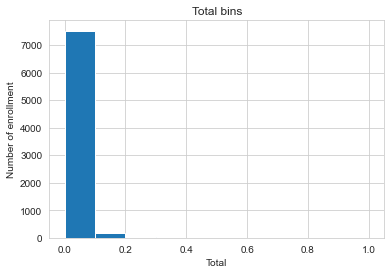

In [154]:
plt.hist(df_min_max_scaled['TOT_ENROLL'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total bins')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [155]:
bins = np.linspace(min(df['TOT_ENROLL']), max(df['TOT_ENROLL']), 4)
bins

array([     0.        ,  68306.66666667, 136613.33333333, 204920.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [156]:
group_names = ['Low', 'Medium', 'High']

In [157]:
df['BINNED_TOT_ENROLL'] = pd.cut(df['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df[['TOT_ENROLL','BINNED_TOT_ENROLL']].head()

,TOT_ENROLL,BINNED_TOT_ENROLL
0,52,Low
1,30,Low
2,24,Low
3,34,Low
4,2243,Low


In [158]:
df['BINNED_TOT_ENROLL'].value_counts()

Low       7730
Medium       4
High         1
Name: BINNED_TOT_ENROLL, dtype: int64

In [159]:
df['BINNED_TOT_ENROLL'] = df['BINNED_TOT_ENROLL'].astype(str)

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

Text(0.5, 1.0, 'Total Bins')

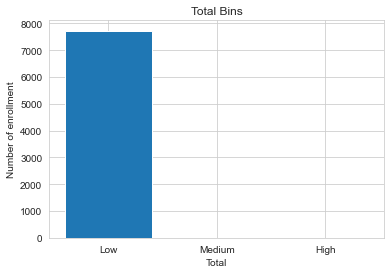

In [160]:
plt.bar(group_names, df['BINNED_TOT_ENROLL'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total Bins')

## Data Mining

### K-Means Clustering

In [161]:
x = df[['LONGITUDE', 'LATITUDE']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X) 

[[-0.09969125 -0.45964748]
 [-1.74962101  0.22208539]
 [-1.57897459 -0.57306609]
 ...
 [-1.5760918  -0.60854424]
 [ 0.35978031 -0.58317059]
 [ 0.41973224  0.44922468]]


In [162]:
model = KMeans(n_clusters = 3, verbose=0)   #build the model
model.fit(X)

KMeans(n_clusters=3)

In [163]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,2
1,0
2,0
3,0
4,1
...,...
7730,1
7731,1
7732,0
7733,2


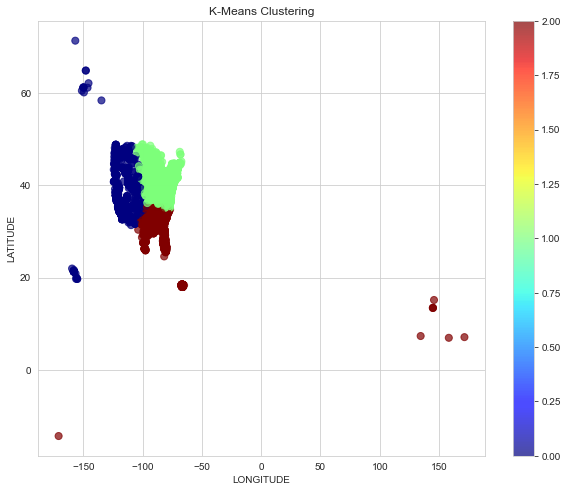

In [164]:
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()

v1 = df['LONGITUDE']
v2 = df['LATITUDE']
plot_kmeans_scatter(v1, v2)

## Exploratory Data Analysis

### Descriptive Question

**“What is the maximum number of part-time enrollment and full-time enrollment of students of colleges and universities in the US?”**

In [165]:
max_pt = df['PT_ENROLL'].max()
max_ft = df['FT_ENROLL'].max()
print('Max number of part-time enrollment:', max_pt)
print('Max number of full-time enrollment:', max_ft)

Max number of part-time enrollment: 65310
Max number of full-time enrollment: 204920


### Exploratory Question

**“What is the relationship between the population and the total enrollment of the colleges and universities students in the US?”**

**Data Visualization**

<AxesSubplot:>

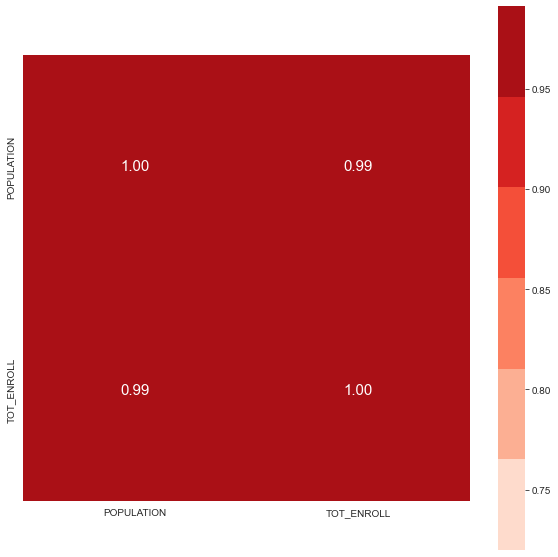

In [166]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

Text(0.5, 1.0, 'Population vs Enrollment')

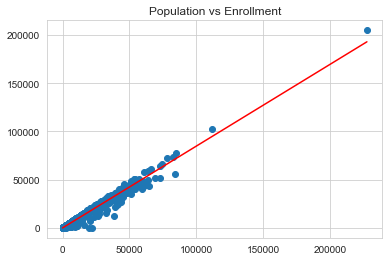

In [167]:
plt.scatter(df['POPULATION'],df['TOT_ENROLL'])
plt.plot(np.unique(df['POPULATION']), np.poly1d(np.polyfit(df['POPULATION'], df['TOT_ENROLL'], 1))
         (np.unique(df['POPULATION'])), color='red')
plt.title('Population vs Enrollment')

### Inferential Question

**“The larger population of the state is linked with a higher total enrollment of college or university. Is this hypothesis also true for the California population?”**

In [168]:
df1 = df.copy()

In [169]:
filter = df1['STATE'] == 'CA'
df1 = df1[filter]
df1.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
9,395195,Colton-Redlands-Yucaipa Regional Occupational ...,1214 Indiana Ct,Redlands,CA,92374,231,San Bernardino,6071,US,...,611519,Other Technical and Trade Schools,6,71,1,0,142,142,89,Low
14,475097,International Culinary Center-California,700 West Hamilton Avenue,Campbell,CA,95008,123,Santa Clara,6085,US,...,611519,Other Technical and Trade Schools,6,85,1,20,54,74,49,Low


<AxesSubplot:>

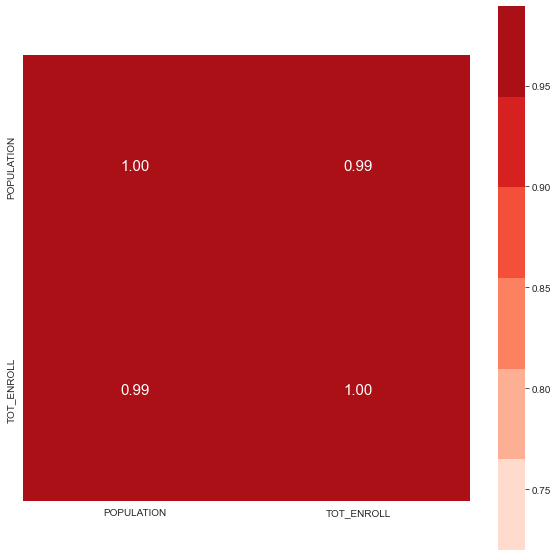

In [170]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df1[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

Text(0.5, 1.0, 'Population vs Enrollment')

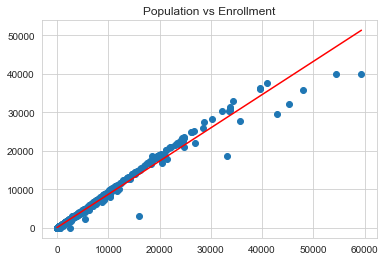

In [171]:
plt.scatter(df1['POPULATION'],df1['TOT_ENROLL'])
plt.plot(np.unique(df1['POPULATION']), np.poly1d(np.polyfit(df1['POPULATION'], df1['TOT_ENROLL'], 1))
         (np.unique(df1['POPULATION'])), color='red')
plt.title('Population vs Enrollment')

### Predictive Question

**“What is the predicted mean of the total enrolled students in the junior colleges by the end of 2021?”**

<AxesSubplot:>

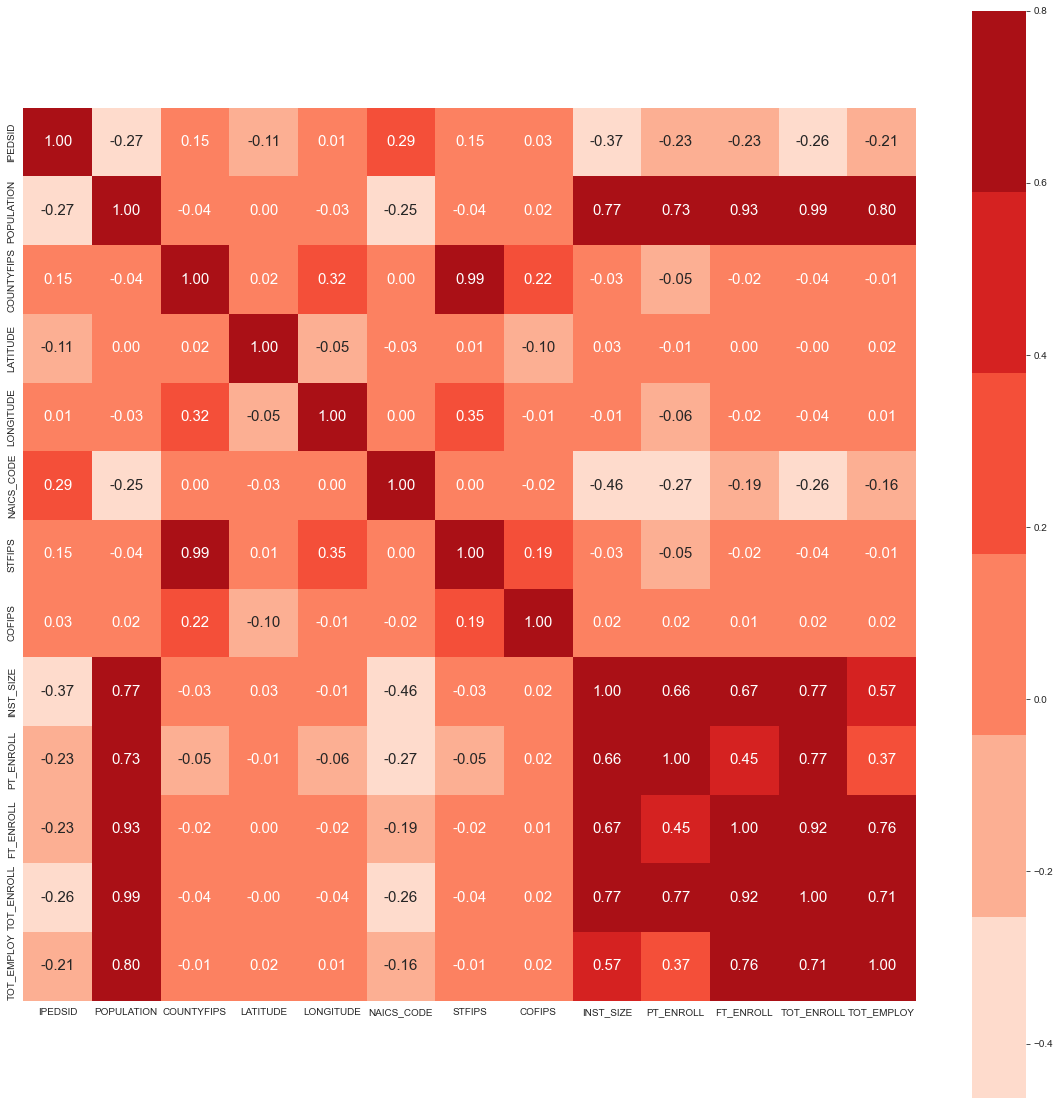

In [172]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

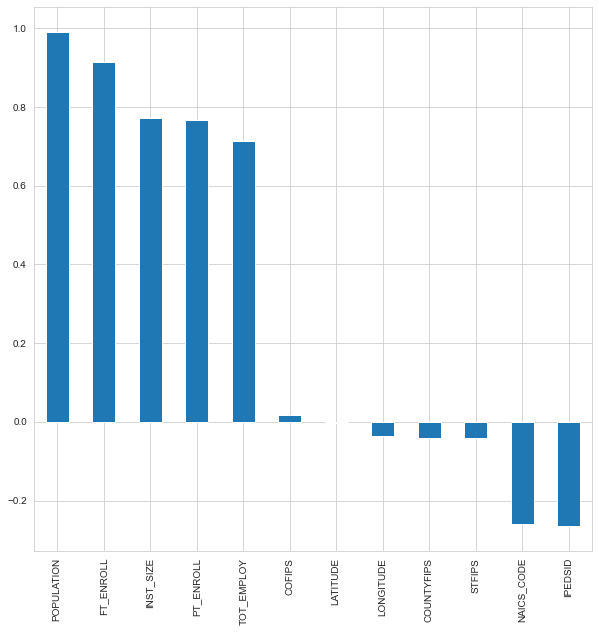

In [173]:
corr_with_enroll = df.corr()["TOT_ENROLL"].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_enroll.drop("TOT_ENROLL").plot.bar()
plt.show()

In [174]:
df

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,Connecticut Center for Massage Therapy-Groton,1154 Poquonnock Rd,Groton,CT,06340,163,New London,9011,US,...,611519,Other Technical and Trade Schools,9,11,1,119,19,138,25,Low
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,Low
7732,443517,Universal College of Beauty Inc-Compton,718 West Compton Blvd,Compton,CA,90220,0,Los Angeles,6037,US,...,611710,Educational Support Services/Closed,6,37,1,0,0,0,0,Low
7733,443526,ITT Technical Institute-Duluth,10700 Abbotts Bridge Rd-Ste 190,Duluth,GA,30097,752,Fulton,13121,US,...,611310,"Colleges, Universities, and Professional Schools",13,121,1,227,441,668,84,Low


In [175]:
df_junior = df_merge.copy()

In [176]:
filter = df_junior['NAICS_DESC'] == 'Junior Colleges'
df_junior = df_junior[filter]
df_junior

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,28643
16,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,902,Chatham,13051,US,...,611210,Junior Colleges,13,51,1,177,586,763,139,21335
26,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,82,Broward,12011,US,...,611210,Junior Colleges,12,11,1,18,47,65,17,139030
37,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,154,Boone,29019,US,...,611210,Junior Colleges,29,19,1,0,121,121,33,13380
38,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,231,Tulsa,40143,US,...,611210,Junior Colleges,40,143,1,17,143,160,71,48445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,313,Duval,12031,US,...,611210,Junior Colleges,12,31,1,45,165,210,103,71995
7723,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,127,Northumberland,42097,US,...,611210,Junior Colleges,42,97,1,0,105,105,22,6571
7726,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,365,Broward,12011,US,...,611210,Junior Colleges,12,11,1,0,331,331,34,139030
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,4032


### Regression

### Split train-test dataset

In [177]:
X = df[['POPULATION']]
Y = df[['TOT_ENROLL']]

Text(0.5, 1.0, 'Population vs Enrollment')

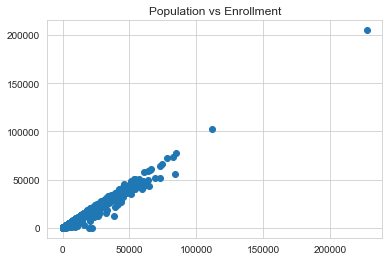

In [178]:
plt.plot(X,Y, linestyle='',marker='o')
plt.title('Population vs Enrollment')

<AxesSubplot:xlabel='POPULATION', ylabel='TOT_ENROLL'>

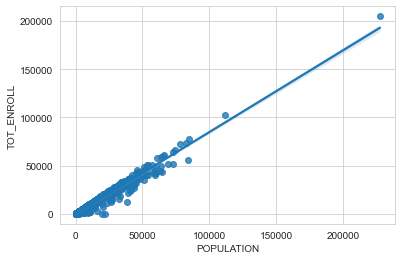

In [179]:
sns.regplot(X, Y, data=df)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [181]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [182]:
lm.coef_

array([[0.84543691]])

In [183]:
lm.intercept_

array([22.70442192])

In [184]:
lm_y_test = lm.predict(X_test)
lm_y_train = lm.predict(X_train)

print('Train r2 score: ', r2_score(lm_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, lm_y_test)) 
print('Train MAE: ', mean_absolute_error(lm_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, lm_y_test))
print('Train MSE: ', mean_squared_error(lm_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, lm_y_test))

Train r2 score:  0.9819861144001455
Test r2 score:  0.9816923218118879
Train MAE:  231.5494600903543
Test MAE:  229.86777539443798
Train MSE:  808259.8912486824
Test MSE:  757975.4924688424


### Create Decision Tree Regression model

In [185]:
dtr1 = DecisionTreeRegressor(max_depth=7)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [186]:
dtr_y_test = dtr1.predict(X_test)
dtr_y_train = dtr1.predict(X_train)

print('Train r2 score: ', r2_score(dtr_y_train, y_train))
print('Test r2 score: ', r2_score(y_test, dtr_y_test)) 
print('Train MAE: ', mean_absolute_error(dtr_y_train, y_train))
print('Test MAE: ',mean_absolute_error(y_test, dtr_y_test))
print('Train MSE: ', mean_squared_error(dtr_y_train, y_train))
print('Test MSE: ',mean_squared_error(y_test, dtr_y_test))

Train r2 score:  0.9916790160379184
Test r2 score:  0.9597524325006341
Train MAE:  167.7700568302921
Test MAE:  263.48660348367974
Train MSE:  376940.8531221265
Test MSE:  1666331.9882809622


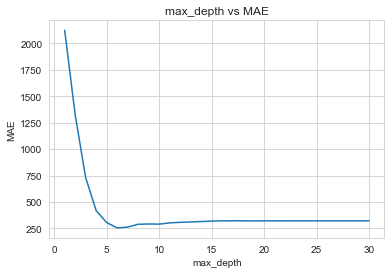

In [187]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE')
plt.show()

In [188]:
df_le = df.copy()

In [189]:
d = defaultdict(LabelEncoder)
col_list = [col for col in df_le.columns.tolist() if df_le[col].dtype.name == "object"]

df_le[col_list] = df_le[col_list].apply(lambda x: d[x.name].fit_transform(x))
df_le.drop("BINNED_TOT_ENROLL", 1, inplace=True)
df_le

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,107840,5846,5743,1478,2,3459,70,764,5119,7,...,-92.260490,611210,7,5,119,1,24,28,52,18
1,112181,1326,6402,410,5,4638,39,808,6067,7,...,-121.289431,611511,3,6,67,1,6,24,30,9
2,116660,3300,1874,1250,5,4231,35,560,6037,7,...,-118.287070,611511,3,6,37,1,0,24,24,11
3,125310,7324,1083,1941,5,4520,43,640,6053,7,...,-121.652662,611511,3,6,53,1,18,16,34,9
4,164368,2899,28,313,22,151,2386,623,25017,7,...,-71.070737,611310,1,25,17,2,0,2243,2243,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,443483,1574,756,890,7,316,163,666,9011,7,...,-72.042638,611519,8,9,11,1,119,19,138,25
7731,443492,5073,908,707,57,1241,3470,588,54049,7,...,-80.160335,611210,7,54,49,2,772,2415,3187,283
7732,443517,6721,6258,464,5,4255,0,560,6037,7,...,-118.236350,611710,4,6,37,1,0,0,0,0
7733,443526,2947,484,602,12,1489,752,345,13121,7,...,-84.176526,611310,1,13,121,1,227,441,668,84


In [190]:
X = df_le.drop(columns=['TOT_ENROLL'])
y = df_le['TOT_ENROLL']

In [191]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [192]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = xTrain.shape[1]
n_cols

20

In [193]:
#add model layers
model.add(Dense(100,  input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='relu'))

In [194]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [195]:
#train model
history = model.fit(xTrain, yTrain, validation_split=0.2, epochs=200, verbose=2)

Epoch 1/200
155/155 - 1s - loss: 53254948.0000 - val_loss: 76588352.0000 - 1s/epoch - 7ms/step
Epoch 2/200
155/155 - 0s - loss: 47503156.0000 - val_loss: 76588352.0000 - 318ms/epoch - 2ms/step
Epoch 3/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 374ms/epoch - 2ms/step
Epoch 4/200
155/155 - 0s - loss: 47503148.0000 - val_loss: 76588352.0000 - 351ms/epoch - 2ms/step
Epoch 5/200
155/155 - 0s - loss: 47503144.0000 - val_loss: 76588352.0000 - 323ms/epoch - 2ms/step
Epoch 6/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 337ms/epoch - 2ms/step
Epoch 7/200
155/155 - 0s - loss: 47503140.0000 - val_loss: 76588352.0000 - 310ms/epoch - 2ms/step
Epoch 8/200
155/155 - 0s - loss: 47503160.0000 - val_loss: 76588352.0000 - 348ms/epoch - 2ms/step
Epoch 9/200
155/155 - 0s - loss: 47503156.0000 - val_loss: 76588352.0000 - 334ms/epoch - 2ms/step
Epoch 10/200
155/155 - 0s - loss: 47503136.0000 - val_loss: 76588352.0000 - 355ms/epoch - 2ms/step
Epoch 11/200
155/155 -

Epoch 84/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 588ms/epoch - 4ms/step
Epoch 85/200
155/155 - 1s - loss: 47503156.0000 - val_loss: 76588352.0000 - 682ms/epoch - 4ms/step
Epoch 86/200
155/155 - 1s - loss: 47503140.0000 - val_loss: 76588352.0000 - 511ms/epoch - 3ms/step
Epoch 87/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 312ms/epoch - 2ms/step
Epoch 88/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 316ms/epoch - 2ms/step
Epoch 89/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 307ms/epoch - 2ms/step
Epoch 90/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 289ms/epoch - 2ms/step
Epoch 91/200
155/155 - 0s - loss: 47503148.0000 - val_loss: 76588352.0000 - 319ms/epoch - 2ms/step
Epoch 92/200
155/155 - 0s - loss: 47503156.0000 - val_loss: 76588352.0000 - 294ms/epoch - 2ms/step
Epoch 93/200
155/155 - 0s - loss: 47503152.0000 - val_loss: 76588352.0000 - 312ms/epoch - 2ms/step
Epoch 94/2

155/155 - 1s - loss: 47503144.0000 - val_loss: 76588352.0000 - 600ms/epoch - 4ms/step
Epoch 167/200
155/155 - 1s - loss: 47503160.0000 - val_loss: 76588352.0000 - 657ms/epoch - 4ms/step
Epoch 168/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 608ms/epoch - 4ms/step
Epoch 169/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 717ms/epoch - 5ms/step
Epoch 170/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 584ms/epoch - 4ms/step
Epoch 171/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 557ms/epoch - 4ms/step
Epoch 172/200
155/155 - 1s - loss: 47503144.0000 - val_loss: 76588352.0000 - 618ms/epoch - 4ms/step
Epoch 173/200
155/155 - 1s - loss: 47503152.0000 - val_loss: 76588352.0000 - 564ms/epoch - 4ms/step
Epoch 174/200
155/155 - 1s - loss: 47503140.0000 - val_loss: 76588352.0000 - 575ms/epoch - 4ms/step
Epoch 175/200
155/155 - 1s - loss: 47503148.0000 - val_loss: 76588352.0000 - 672ms/epoch - 4ms/step
Epoch 176/200


In [196]:
nn_y_test = model.predict(xTest)
nn_y_train = model.predict(xTrain)

In [197]:
print('Train r2 score: ', r2_score(yTrain, nn_y_train))
print('Test r2 score: ', r2_score(yTest, nn_y_test)) 
print('Train MAE: ', mean_absolute_error(yTrain, nn_y_train))
print('Test MAE: ',mean_absolute_error(yTest, nn_y_test))
print('Train MSE: ', mean_squared_error(yTrain, nn_y_train))
print('Test MSE: ',mean_squared_error(yTest, nn_y_test))

Train r2 score:  -0.16737308902767123
Test r2 score:  -0.18106723382770928
Train MAE:  2764.9767291532
Test MAE:  2737.983839689722
Train MSE:  53322070.77246283
Test MSE:  48898610.13510019


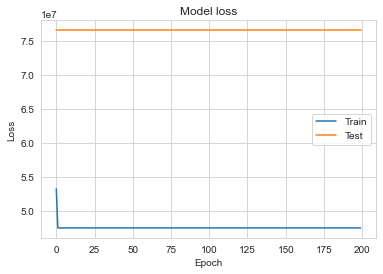

In [198]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

### Data visualization for prediction of regression model

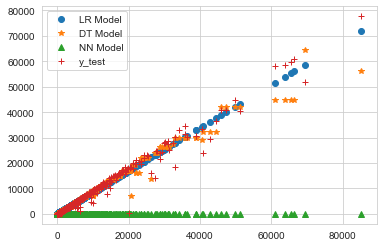

In [199]:
plt.plot(X_test,lm_y_test, linestyle='',marker='o', label='LR Model')
plt.plot(X_test,dtr_y_test, linestyle='',marker='*', label='DT Model')
plt.plot(X_test,nn_y_test, linestyle='',marker='^', label='NN Model')
plt.plot(X_test,y_test, linestyle='',marker='+', label='y_test')
plt.ticklabel_format(style='plain')
plt.legend()

### Model prediction 

In [200]:
real_X = df_junior[['POPESTIMATE2021']]
real_X

,POPESTIMATE2021
0,28643
16,21335
26,139030
37,13380
38,48445
...,...
7715,71995
7723,6571
7726,139030
7731,4032


In [201]:
df_nn = df_junior.copy()
df_nn.drop(['POPULATION'], 1, inplace=True)
df_nn.rename(columns ={'POPESTIMATE2021':'POPULATION'}, inplace=True)
df_nn

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPULATION
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,Pulaski,5119,US,34.759308,...,611210,Junior Colleges,5,119,1,24,28,52,18,28643
16,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,Chatham,13051,US,31.983580,...,611210,Junior Colleges,13,51,1,177,586,763,139,21335
26,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,Broward,12011,US,26.025270,...,611210,Junior Colleges,12,11,1,18,47,65,17,139030
37,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,Boone,29019,US,38.915735,...,611210,Junior Colleges,29,19,1,0,121,121,33,13380
38,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,Tulsa,40143,US,36.088311,...,611210,Junior Colleges,40,143,1,17,143,160,71,48445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,Duval,12031,US,30.220468,...,611210,Junior Colleges,12,31,1,45,165,210,103,71995
7723,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,Northumberland,42097,US,40.855276,...,611210,Junior Colleges,42,97,1,0,105,105,22,6571
7726,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,Broward,12011,US,26.162566,...,611210,Junior Colleges,12,11,1,0,331,331,34,139030
7731,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,Marion,54049,US,39.482878,...,611210,Junior Colleges,54,49,2,772,2415,3187,283,4032


In [202]:
col_list = [col for col in df_nn.columns.tolist() if df_nn[col].dtype.name == "object"]

df_nn[col_list] = df_nn[col_list].apply(lambda x: d[x.name].fit_transform(x))
nn_real_X = df_nn.drop('TOT_ENROLL', 1)

In [203]:
lm_y_pred = lm.predict(real_X)
drt_y_pred = dtr1.predict(real_X)
nn_y_pred = model.predict(nn_real_X)
lm_y_pred = pd.DataFrame(lm_y_pred, columns=['LR'])
drt_y_pred = pd.DataFrame(drt_y_pred, columns=['DT'])
nn_y_pred = pd.DataFrame(nn_y_pred, columns=['NN'])

In [204]:
lm_y_pred = lm_y_pred.astype(int)
drt_y_pred = drt_y_pred.astype(int)
nn_y_pred = nn_y_pred.astype(int)

In [205]:
df_new = pd.concat([df_junior.reset_index(drop=True), lm_y_pred, drt_y_pred, nn_y_pred], axis=1) 

df_new

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,POPESTIMATE2021,LR,DT,NN
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,119,1,24,28,52,18,28643,24238,26222,100789
1,475352,Virginia College-Savannah,"14045 Abercorn Street, Suite 1503",Savannah,GA,31419,902,Chatham,13051,US,...,51,1,177,586,763,139,21335,18060,19147,0
2,475477,City College-Hollywood,6565 Taft Street,Hollywood,FL,33024,82,Broward,12011,US,...,11,1,18,47,65,17,139030,117563,102887,0
3,475583,Bryan University,3215 LeMone Industrial Boulevard,Columbia,MO,65201,154,Boone,29019,US,...,19,1,0,121,121,33,13380,11334,11460,0
4,475592,Virginia College-Tulsa,5124 South Peoria Avenue,Tulsa,OK,74105,231,Tulsa,40143,US,...,143,1,17,143,160,71,48445,40979,42109,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,443270,Southeastern College-Jacksonville,"6700 Southpoint Parkway, Suite 400",Jacksonville,FL,32216,313,Duval,12031,US,...,31,1,45,165,210,103,71995,60889,64514,0
1994,443377,Triangle Tech Inc-Sunbury,191 Performance Road,Sunbury,PA,17801,127,Northumberland,42097,US,...,97,1,0,105,105,22,6571,5578,5690,0
1995,443438,Medvance Institute-Fort Lauderdale,"4850 W. Oakland Park Blvd., Suite 200",Lauderdale Lakes,FL,33313,365,Broward,12011,US,...,11,1,0,331,331,34,139030,117563,102887,0
1996,443492,Pierpont Community and Technical College,1201 Locust Ave,Fairmont,WV,26554,3470,Marion,54049,US,...,49,2,772,2415,3187,283,4032,3431,3568,0


### Data visualization

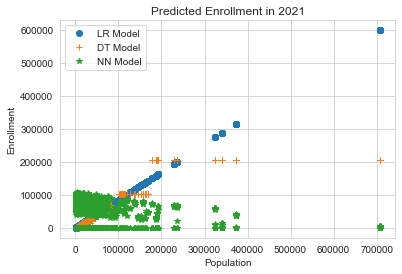

In [206]:
plt.plot(df_new['POPESTIMATE2021'],df_new['LR'], linestyle='',marker='o', label='LR Model')
plt.plot(df_new['POPESTIMATE2021'],df_new['DT'], linestyle='',marker='+', label='DT Model')
plt.plot(df_new['POPESTIMATE2021'],df_new['NN'], linestyle='',marker='*', label='NN Model')
plt.xlabel('Population')
plt.ylabel('Enrollment')
plt.title('Predicted Enrollment in 2021')
plt.ticklabel_format(style='plain')
plt.legend()

In [207]:
print('LR mean: ', df_new['LR'].mean())
print('DT mean: ', df_new['DT'].mean())
print('NN mean: ', df_new['NN'].mean())

LR mean:  64604.514014014014
DT mean:  50456.331831831834
NN mean:  44194.24374374374


### Causal Question

**“Will an increase in the size of institutions increase the total enrollment of students of colleges and universities in the US?”**

In [208]:
df2 = df.copy()
filter = df2['INST_SIZE'] > 0
df2 = df2[filter]
df2.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,COFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,119,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,611511,Cosmetology and Barber Schools,6,67,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,611511,Cosmetology and Barber Schools,6,37,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,611511,Cosmetology and Barber Schools,6,53,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,611310,"Colleges, Universities, and Professional Schools",25,17,2,0,2243,2243,143,Low


<AxesSubplot:>

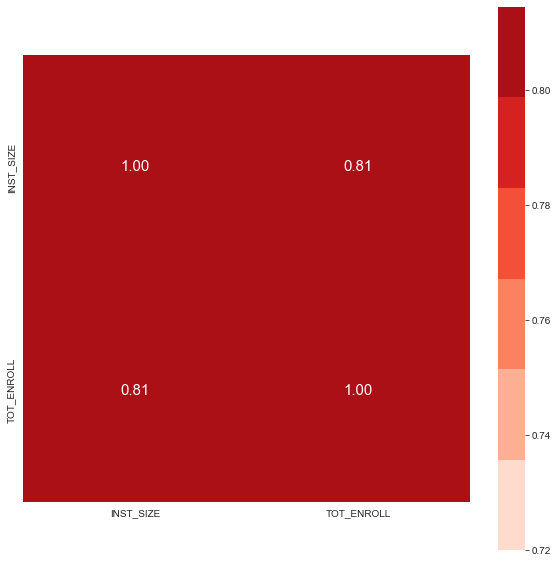

In [209]:
corr_list = list(['INST_SIZE', 'TOT_ENROLL'])
corr = df2[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

Text(0.5, 1.0, 'Institution size vs Enrollment')

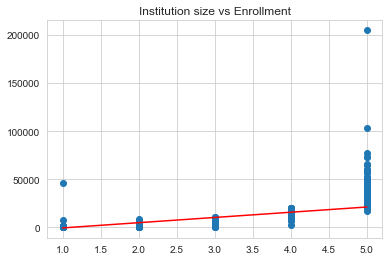

In [210]:
plt.scatter(df2['INST_SIZE'],df2['TOT_ENROLL'])
plt.plot(np.unique(df2['INST_SIZE']), np.poly1d(np.polyfit(df2['INST_SIZE'], df2['TOT_ENROLL'], 1))
         (np.unique(df2['INST_SIZE'])), color='red')
plt.title('Institution size vs Enrollment')